In [ ]:
#Faiyaz Khan
#lvg182
#CMPT815

In [75]:
# Clean performance metrics csv
# Python script for processing the file, separating columns, and saving as a new CSV file.

import pandas as pd

# File path for the input and output files
input_file = 'data/02. Fedora 40 - Haveged - 1/performance_metrics.csv'
output_file = 'data/02. Fedora 40 - Haveged - 1/performance_metrics_cleaned.csv'

# Read the file, using whitespace as the delimiter to separate columns
data = pd.read_csv(input_file, delim_whitespace=True)

# Save the cleaned data to a new CSV file
data.to_csv(output_file, index=False)

# Display the first few rows of the cleaned data to confirm the structure
data.head(), output_file


/tmp/ipykernel_2832156/1492729638.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(input_file, delim_whitespace=True)


(   11:08:44  AM  CPU  %user  %nice  %system  %iowait  %steal  %idle
 0  11:08:45  AM  all   0.19    0.0     0.56     0.06     0.0  99.19
 1  11:08:46  AM  all   0.38    0.0     0.63     0.00     0.0  99.00
 2  11:08:47  AM  all   0.50    0.0     1.94     0.00     0.0  97.56
 3  11:08:48  AM  all   3.53    0.0     3.59     0.06     0.0  92.81
 4  11:08:49  AM  all   2.45    0.0     2.83     0.00     0.0  94.72,
 'data/02. Fedora 40 - Haveged - 1/performance_metrics_cleaned.csv')

---
---
# Analysis of Individual Systems

## Ubuntu 18.04.5 LTS

### System Config
- Linux Kernel 5.4.0-42
- OS Type 64 bit
- Intel Core i5-8400 CPU @ 2.80GHz x 6
- Memory: 62.7 GB

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


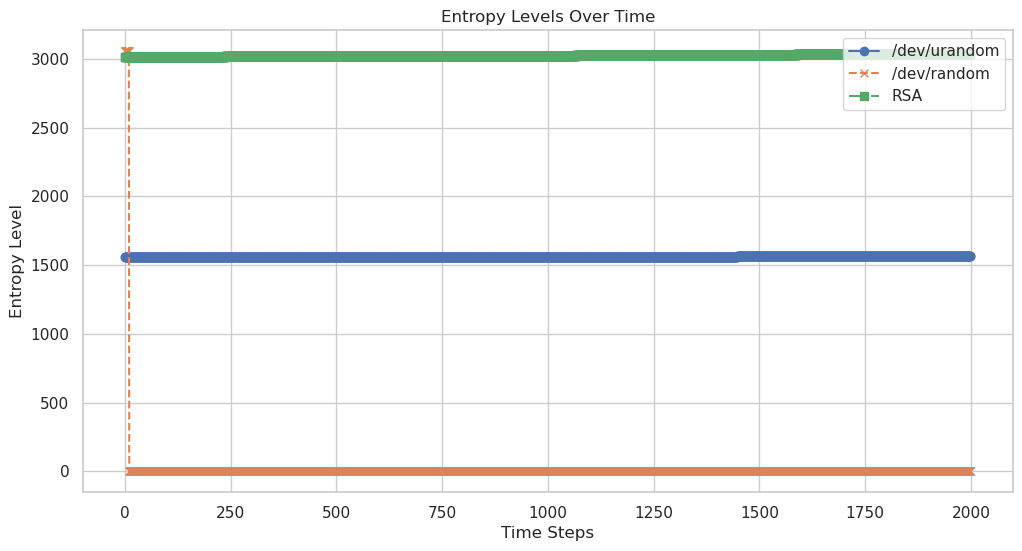

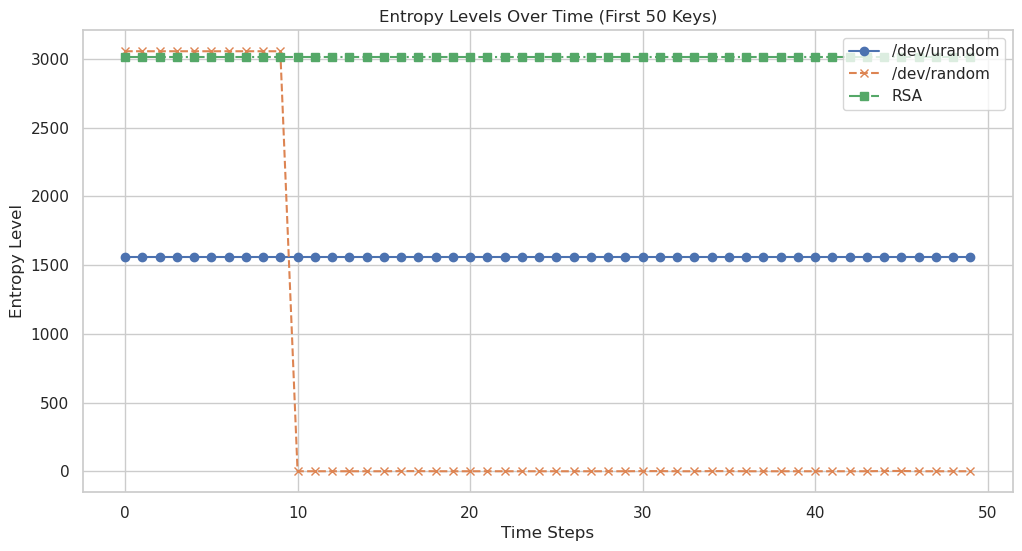

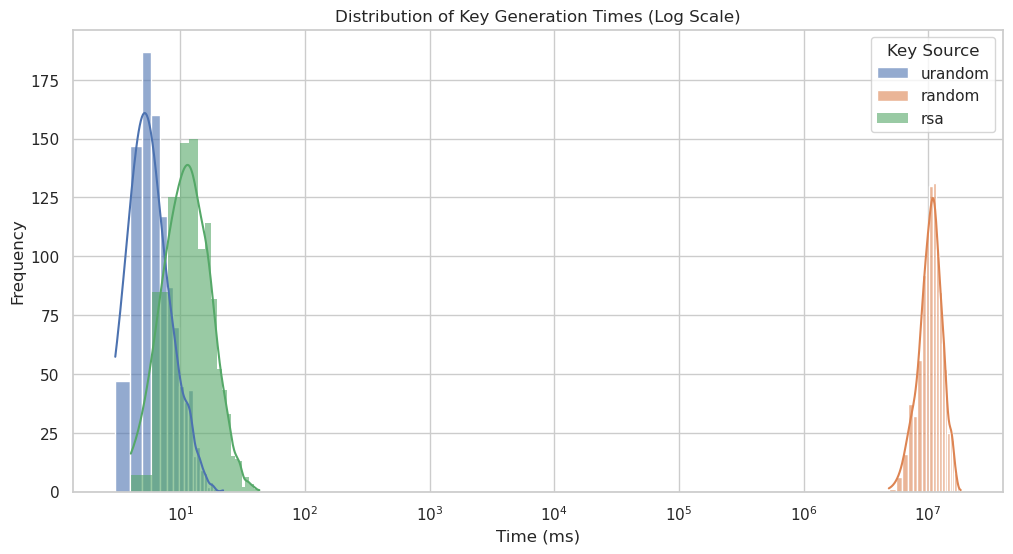

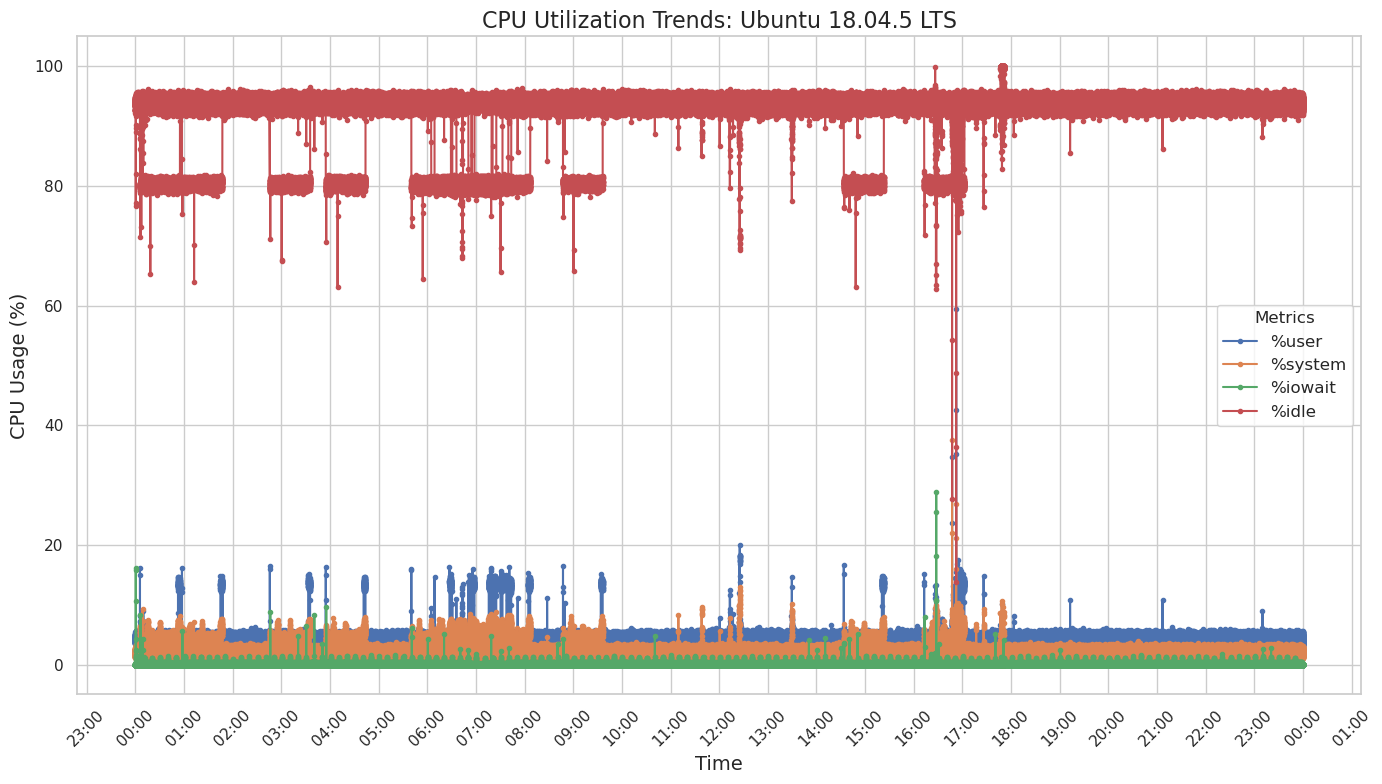

Key Generation Time Statistics for Ubuntu 18.04.5 LTS:
           urandom        random          rsa
count  1000.000000  1.000000e+03  1000.000000
mean      7.024000  1.107365e+07    14.585000
std       3.032263  2.222614e+06     6.238244
min       3.000000  4.834551e+06     4.000000
25%       5.000000  9.609569e+06    10.000000
50%       6.000000  1.099250e+07    13.000000
75%       9.000000  1.251889e+07    18.000000
max      22.000000  1.825398e+07    43.000000
Correlation between mean entropy and key generation time: -0.87


In [12]:
#Analysis of Individual Systems - 01. Ubuntu 18.04.5 LTS
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Ubuntu 18.04.5 LTS/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())



# Load data for - 01. Ubuntu 18.04.5 LTS
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Ubuntu 18.04.5 LTS/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Ubuntu 18.04.5 LTS/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Ubuntu 18.04.5 LTS/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Ubuntu 18.04.5 LTS/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Ubuntu 18.04.5 LTS/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Ubuntu 18.04.5 LTS/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 18.04.5 LTS")


# 6. Statistical Analysis
# Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 18.04.5 LTS:")
print(stats_summary)

# Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)
print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output - Ubuntu 18.04.5 LTS

The experimental results for Ubuntu 18.04.5 LTS indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
    - **count**: Indicates the number of samples measured for each source (1,000 samples per category).
    - **mean (Average):**
      - `urandom`: Faster on average, with a mean of 7.02 ms.
      - `random`: Significantly slower with a mean of 11.07 million ms (~3 hours), reflecting its dependency on system entropy.
      - `rsa`: Slower than `urandom` due to computational complexity, with a mean of 14.58 ms.
    - **std (Standard Deviation):**
      - `urandom` and `rsa`: Moderate variability in key generation times.
      - `random`: Higher variability due to fluctuating entropy availability.
    - **min and max**:
      - `urandom`: Consistently fast with a maximum time of 22 ms.
      - `random`: The slowest, with a maximum time of 18.25 million ms (~5 hours).
      - `rsa`: Maximum key generation time of 43 ms, showing more variability compared to `urandom`.
    - **Percentiles (25%, 50%, 75%)**:
      - `urandom`: Tight clustering around the median, indicating consistent performance.
      - `random`: Wide spread, showcasing high dependency on system entropy.
      - `rsa`: More variability in the upper range (75% and max).

- **Correlation:**
    The correlation coefficient between mean entropy and key generation time is -0.87, indicating a strong negative relationship. When entropy decreases, key generation times tend to increase significantly, particularly for `random`.

---
## Ubuntu 19.10

### System Config
- Linux Kernel 5.3.0-18
- OS Type 64 bit
- Intel Core i7-11700K @ 3.60GHz x 16
- Memory: 62.4 GB

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


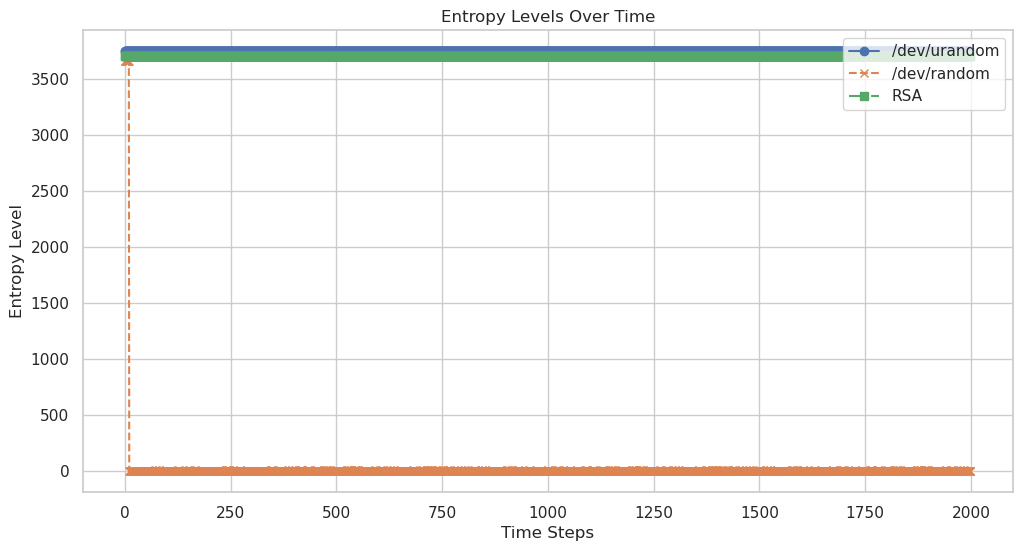

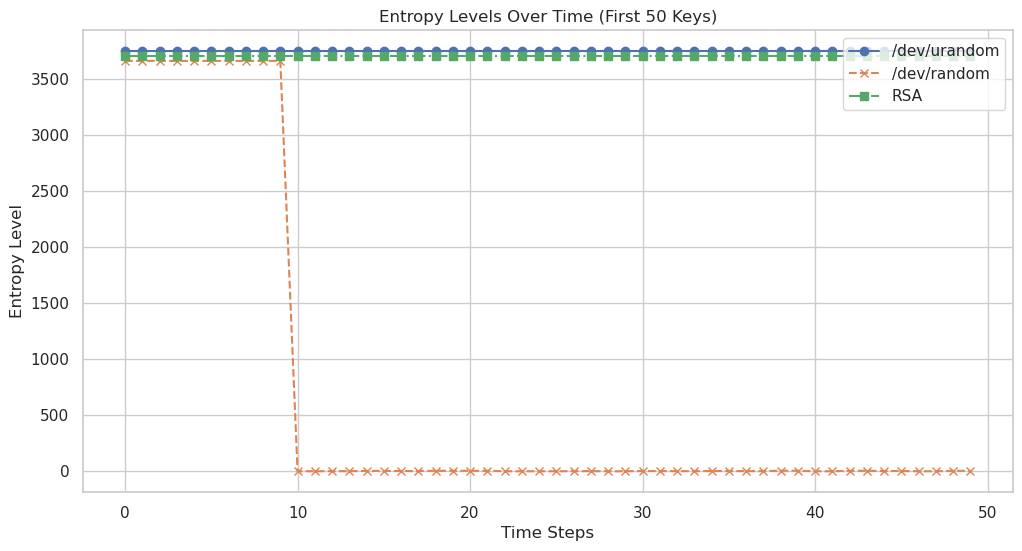

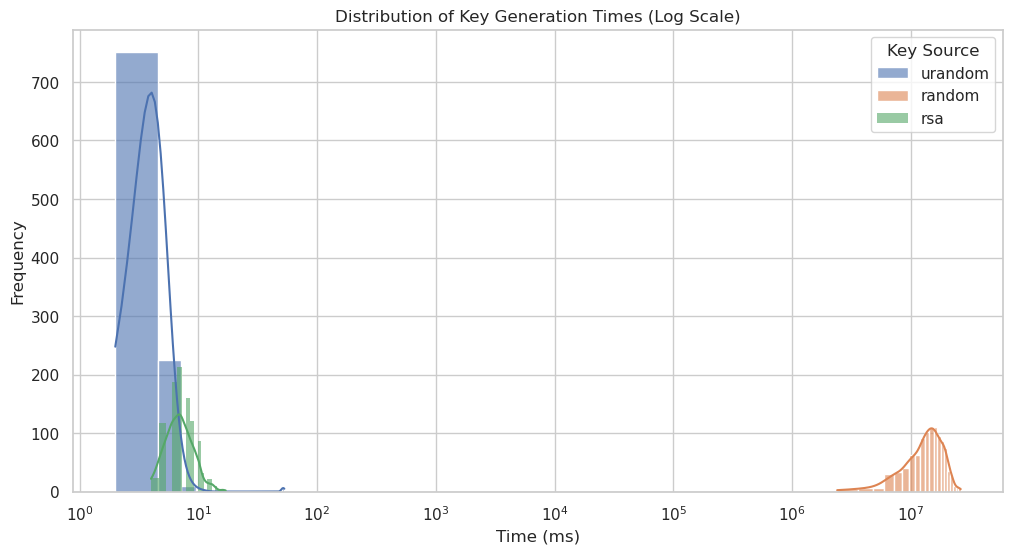

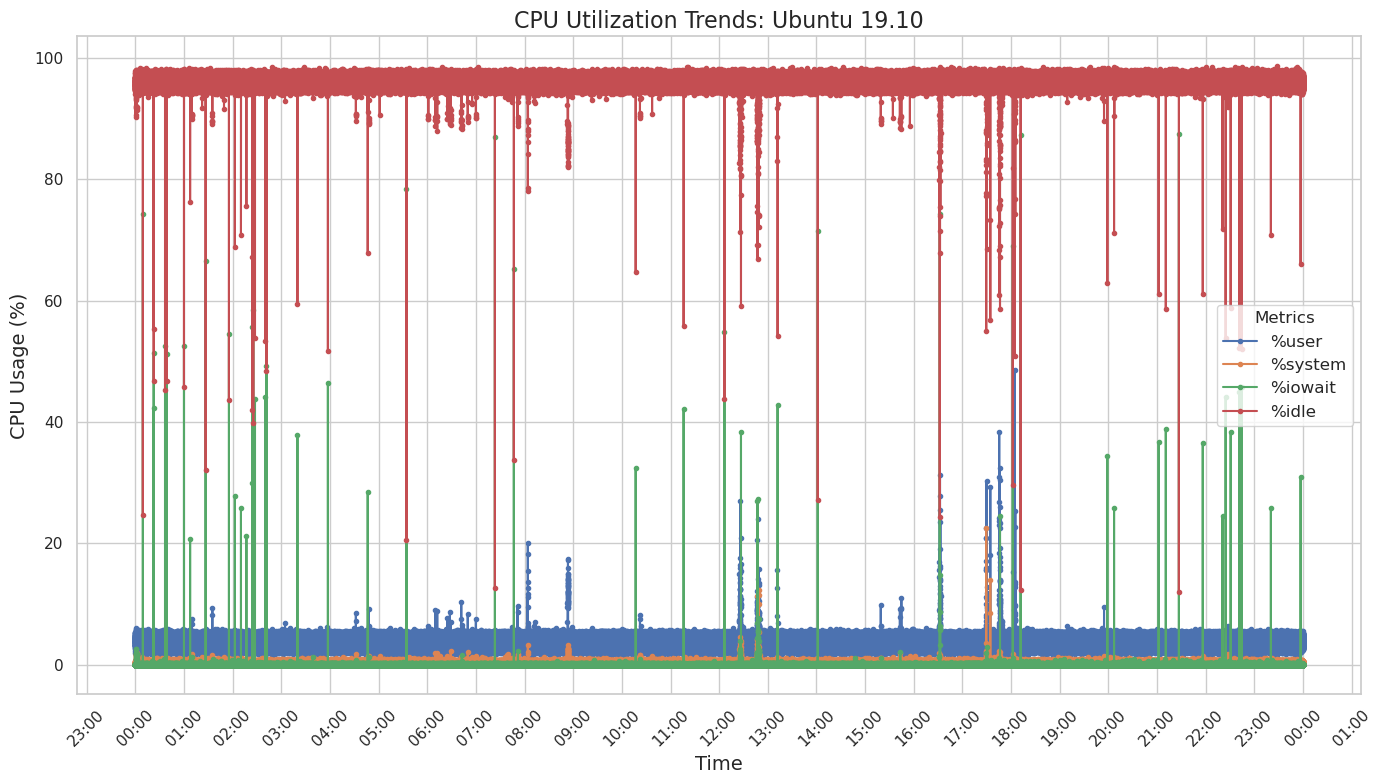

Key Generation Time Statistics for Ubuntu 19.10:
           urandom        random          rsa
count  1000.000000  1.000000e+03  1000.000000
mean      4.646000  1.477628e+07     7.692000
std       4.848318  4.295601e+06     2.228475
min       2.000000  2.388314e+06     4.000000
25%       4.000000  1.197913e+07     6.000000
50%       4.000000  1.484805e+07     7.000000
75%       4.000000  1.783558e+07     9.000000
max      53.000000  2.619349e+07    17.000000
Correlation between mean entropy and key generation time: -1.00


In [16]:
#Analysis of Individual Systems - 02. Ubuntu 19.10
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 19.10/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Ubuntu 19.10/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())

# Load data for - 01. Ubuntu 19.10
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Ubuntu 19.10/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Ubuntu 19.10/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Ubuntu 19.10/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Ubuntu 19.10/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Ubuntu 19.10/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Ubuntu 19.10/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Ubuntu 19.10/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 19.10")


# 6. Statistical Analysis
# Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 19.10:")
print(stats_summary)

# Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)

print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output - Ubuntu 19.10

The experimental results for Ubuntu 19.10 indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
    - **count**: Indicates the number of key generation samples measured (1,000 samples for each source).
    - **mean**: The average key generation time across the samples.
      - `urandom`: Fastest on average with 4.65 ms.
      - `random`: Significantly slower due to dependency on system entropy, with an average of 14.78 million ms (approximately 4 hours).
      - `rsa`: Slower than `urandom` due to computational complexity, with an average of 7.69 ms.
    - **std (Standard Deviation)**: Measures variability in key generation times.
      - `urandom` and `rsa`: Low variability.
      - `random`: High variability due to the fluctuating availability of entropy.
    - **min and max**: The shortest and longest key generation times observed.
      - `random` exhibits the highest maximum value (26.19 million ms, about 7.3 hours), illustrating its dependency on entropy.
    - **Percentiles (25%, 50%, 75%)**: Provide a detailed look at the distribution of key generation times.
      - `urandom` and `rsa` times are clustered tightly around the median (50%).
      - `random` shows a wide spread, reinforcing its high variability.

- **Correlation:**
    The correlation coefficient between mean entropy and key generation time is -1.00, indicating a perfect inverse relationship. As system entropy decreases, the key generation time increases sharply, especially for entropy-dependent sources like `random`.



---
## Fedora 40

### System Config
- Linux Kernel 6.11.8-200
- OS Type 64 bit
- Intel Core i7-11700K @ 3.60GHz x 16
- Memory: 64 GB

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


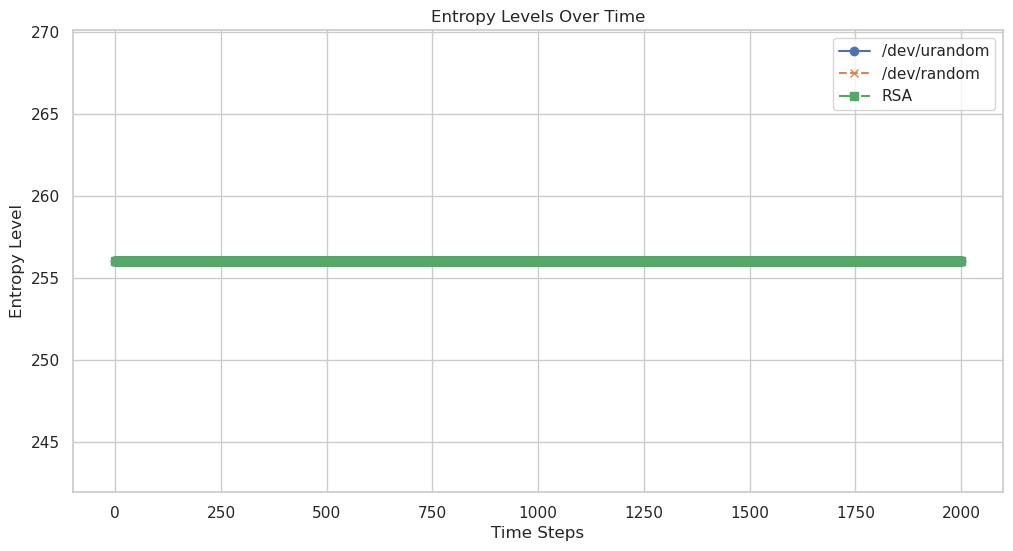

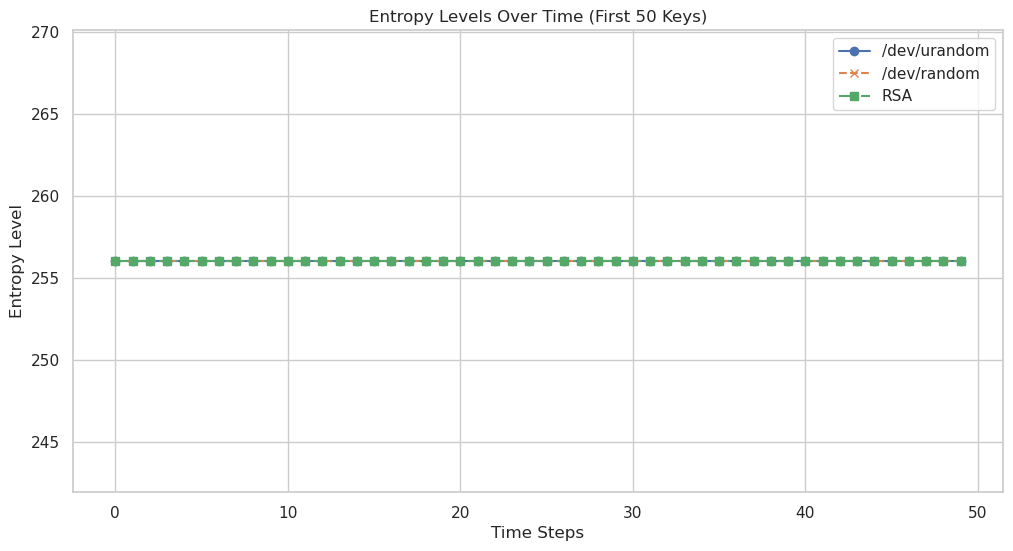

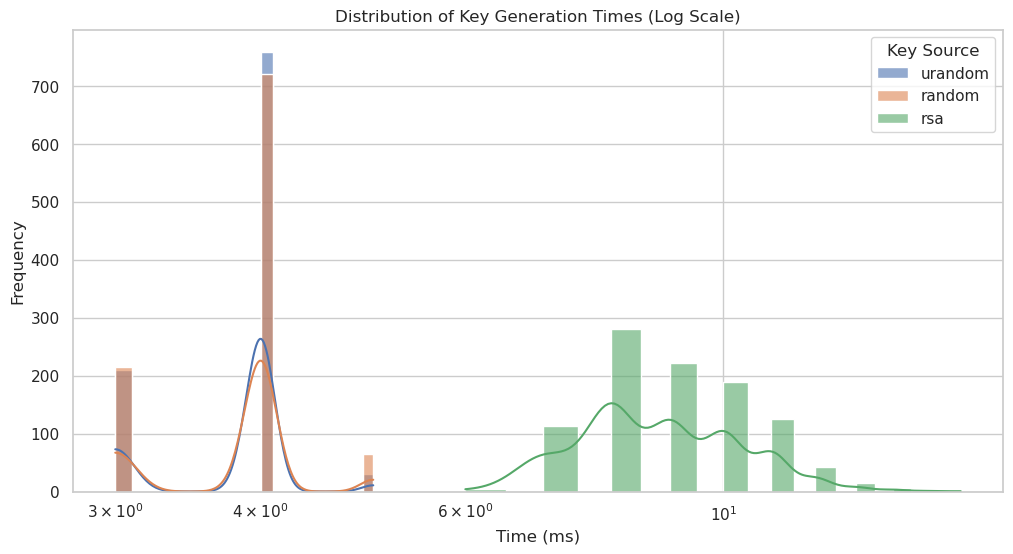

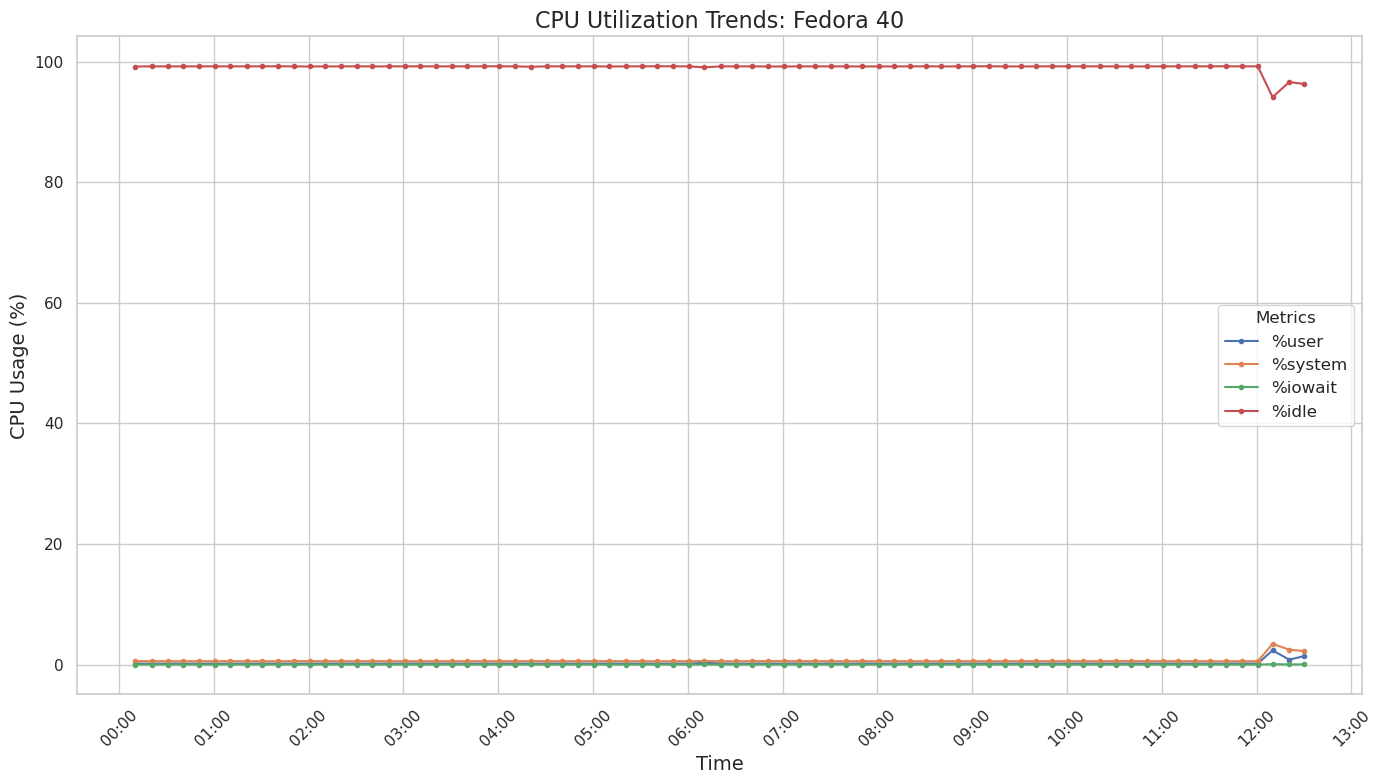

Key Generation Time Statistics for Fedora 40:
           urandom       random          rsa
count  1000.000000  1000.000000  1000.000000
mean      3.821000     3.851000     9.154000
std       0.457349     0.507007     1.522696
min       3.000000     3.000000     6.000000
25%       4.000000     4.000000     8.000000
50%       4.000000     4.000000     9.000000
75%       4.000000     4.000000    10.000000
max       5.000000     5.000000    16.000000
The following columns have constant values (zero variance): ['urandom', 'random', 'rsa']
Correlation cannot be computed for these columns because standard deviation is zero.
In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) are constant, resulting in zero variance. As a result, the Pearson correlation cannot be computed because it involves division by the standard deviation. This outcome aligns with the expected outcome, as the entropy levels are stuck at 256 regardless of the load.


In [20]:
#Analysis of Individual Systems - 03. Fedora 40
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Fedora 40/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Fedora 40/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())

# Load data for - 01. Fedora 40
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Fedora 40/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Fedora 40/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Fedora 40/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Fedora 40/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Fedora 40/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Fedora 40/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Fedora 40/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Fedora 40")


# 6. Statistical Analysis
# Example: Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Fedora 40:")
print(stats_summary)

# Correlation between entropy and key generation time
# Check for constant columns
constant_columns = entropy_df.columns[entropy_df.std() == 0]

if not constant_columns.empty:
    print(f"The following columns have constant values (zero variance): {constant_columns.tolist()}")
    print("Correlation cannot be computed for these columns because standard deviation is zero.")
    explanation = (
        "In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) "
        "are constant, resulting in zero variance. As a result, the Pearson correlation cannot "
        "be computed because it involves division by the standard deviation. This outcome aligns "
        "with the expected outcome, as the entropy levels are stuck at 256 regardless of the load."
    )
    print(explanation)
else:

    entropy_mean = entropy_df.mean()
    time_mean = time_df.mean()
    correlation = entropy_mean.corr(time_mean)
    print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output - Fedora 40

The experimental results for Fedora 40 indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
  - **Mean**: On average, `urandom` and `random` show similar key generation times (around 3.82 ms and around 3.85 ms, respectively), while RSA operations are slower (around 9.15 ms on average).
  - **Standard Deviation (std)**: RSA exhibits higher variability (around 1.52 ms) compared to `urandom` and `random` (around 0.45–0.51 ms).
  - **Range**: The minimum times for all sources are consistent (3 ms for `urandom` and `random`, 6 ms for RSA). However, RSA has a much wider range of times (up to 16 ms), suggesting greater inconsistency in performance.
  - **Zero Variance**: The entropy levels across these sources are constant during the experiment, resulting in zero variance.


- **Entropy Behavior**:
  The entropy values for all sources (`urandom`, `random`, and RSA) were observed to remain constant at 256.


### Why Entropy is Stuck at 256 - Fedora 40

The linux kernel version of Fedora 40 is 6.11.8. Based on the Linux documentation for RNG enhancements in versions 5.17 and 5.18, there has been a unification that ensures both `/dev/random` and `/dev/urandom` now function identically, providing the same cryptographically secure random numbers. This change removed the discrepancies between blocking (waiting for entropy) and non-blocking sources. Also, starting from Linux 5.4, the kernel introduced mechanisms to actively add entropy using techniques like jitter from CPU cycle counters. This prevents entropy depletion and ensures that the system can very quickly replenish entropy to the maximum level, which has been set to 256.

---
---
# Comparison between different operating systems


--- Analyzing Urandom ---
Statistics for Urandom:

Fedora40:
  Entropy - Mean: 256.00, Std Dev: 0.00, Min: 256, Max: 256
  Time - Mean: 3.82, Std Dev: 0.46, Min: 3, Max: 5

Ubuntu18:
  Entropy - Mean: 1560.60, Std Dev: 1.78, Min: 1557, Max: 1563
  Time - Mean: 7.02, Std Dev: 3.03, Min: 3, Max: 22

Ubuntu19:
  Entropy - Mean: 3746.69, Std Dev: 0.46, Min: 3746, Max: 3747
  Time - Mean: 4.65, Std Dev: 4.85, Min: 2, Max: 53


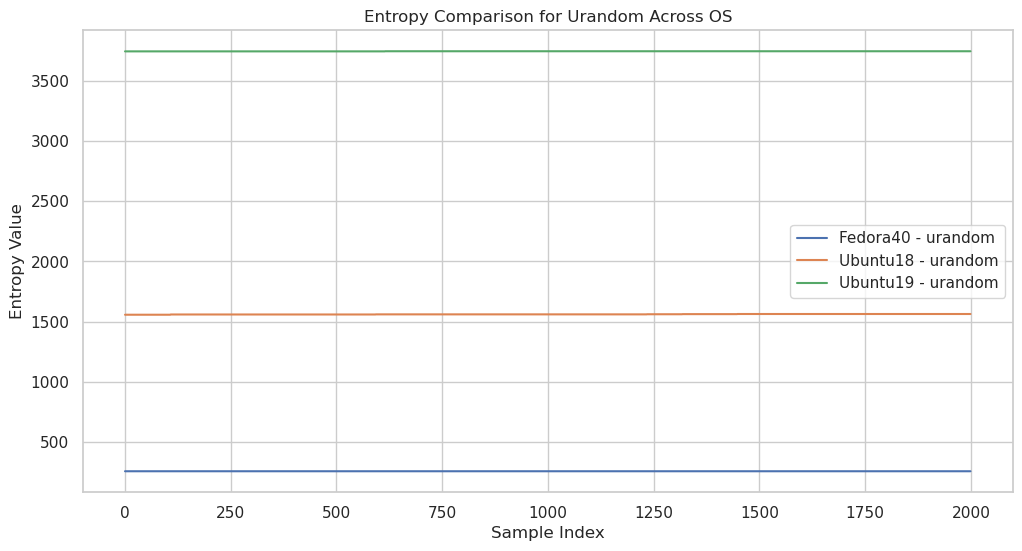

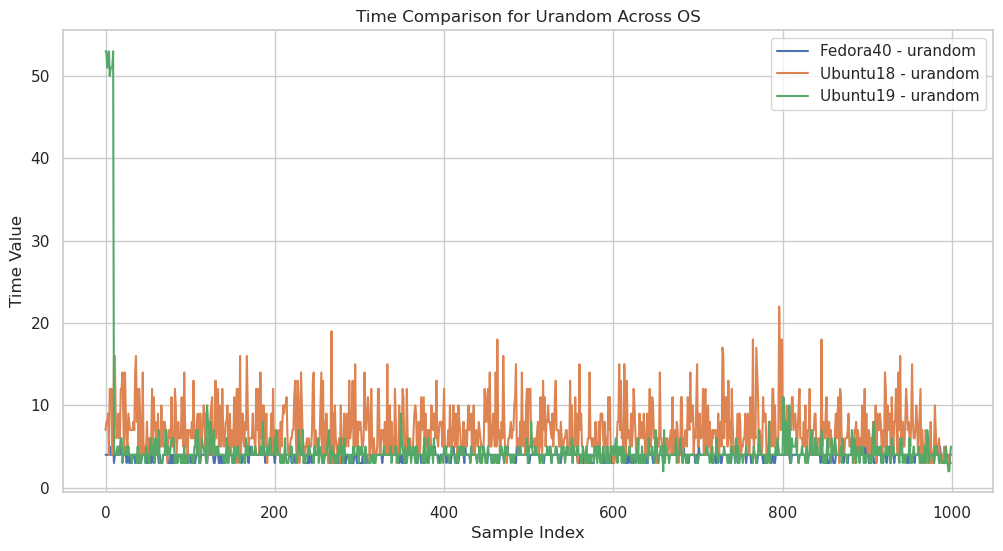


ANOVA Results for Urandom:
Entropy - F-statistic: 5531445888.45
Time - F-statistic: 252.12

--- Analyzing Random ---
Statistics for Random:

Fedora40:
  Entropy - Mean: 256.00, Std Dev: 0.00, Min: 256, Max: 256
  Time - Mean: 3.85, Std Dev: 0.51, Min: 3, Max: 5

Ubuntu18:
  Entropy - Mean: 15.66, Std Dev: 215.58, Min: 0, Max: 3056
  Time - Mean: 11073650.35, Std Dev: 2222614.31, Min: 4834551, Max: 18253985

Ubuntu19:
  Entropy - Mean: 20.66, Std Dev: 258.06, Min: 0, Max: 3660
  Time - Mean: 14776277.87, Std Dev: 4295600.86, Min: 2388314, Max: 26193491


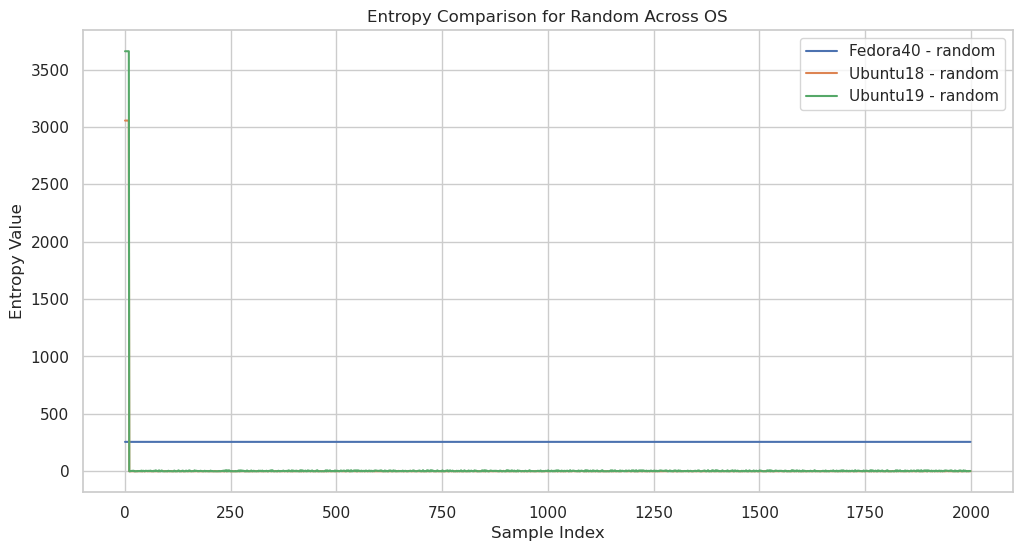

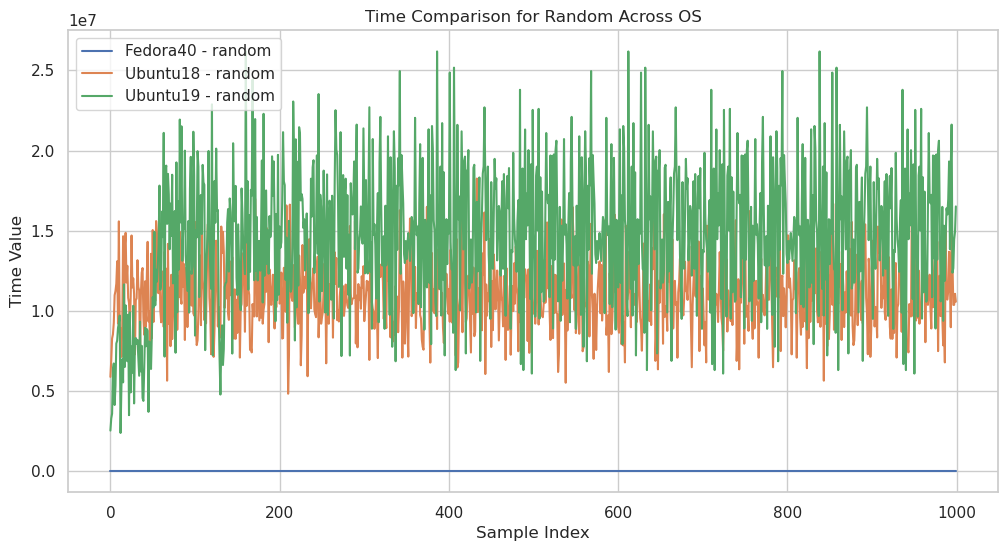


ANOVA Results for Random:
Entropy - F-statistic: 1000.90
Time - F-statistic: 7581.02

--- Analyzing Rsa ---
Statistics for Rsa:

Fedora40:
  Entropy - Mean: 256.00, Std Dev: 0.00, Min: 256, Max: 256
  Time - Mean: 9.15, Std Dev: 1.52, Min: 6, Max: 16

Ubuntu18:
  Entropy - Mean: 3025.67, Std Dev: 6.28, Min: 3017, Max: 3035
  Time - Mean: 14.59, Std Dev: 6.24, Min: 4, Max: 43

Ubuntu19:
  Entropy - Mean: 3703.62, Std Dev: 0.49, Min: 3703, Max: 3704
  Time - Mean: 7.69, Std Dev: 2.23, Min: 4, Max: 17


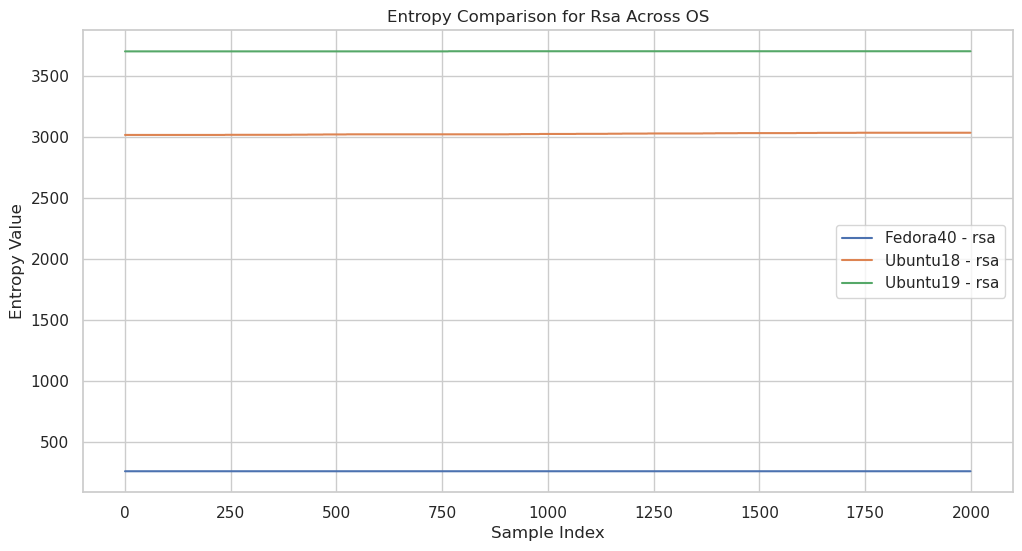

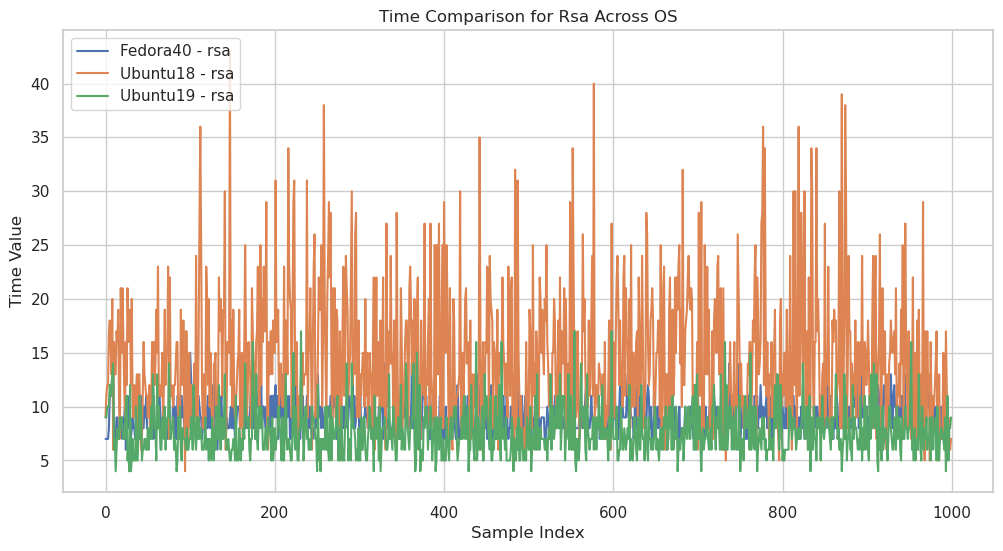


ANOVA Results for Rsa:
Entropy - F-statistic: 505276014.85
Time - F-statistic: 856.56


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

# File paths
data_files = {
    "Fedora40": {
        "urandom_entropy": "data/01. Fedora 40/urandom_entropy_log.txt",
        "urandom_time": "data/01. Fedora 40/urandom_wait_log.txt",
        "random_entropy": "data/01. Fedora 40/random_entropy_log.txt",
        "random_time": "data/01. Fedora 40/random_wait_log.txt",
        "rsa_entropy": "data/01. Fedora 40/rsa_entropy_log.txt",
        "rsa_time": "data/01. Fedora 40/rsa_wait_log.txt"
    },
    "Ubuntu18": {
        "urandom_entropy": "data/01. Ubuntu 18.04.5 LTS/urandom_entropy_log.txt",
        "urandom_time": "data/01. Ubuntu 18.04.5 LTS/urandom_wait_log.txt",
        "random_entropy": "data/01. Ubuntu 18.04.5 LTS/random_entropy_log.txt",
        "random_time": "data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt",
        "rsa_entropy": "data/01. Ubuntu 18.04.5 LTS/rsa_entropy_log.txt",
        "rsa_time": "data/01. Ubuntu 18.04.5 LTS/rsa_wait_log.txt"
    },
    "Ubuntu19": {
        "urandom_entropy": "data/01. Ubuntu 19.10/urandom_entropy_log.txt",
        "urandom_time": "data/01. Ubuntu 19.10/urandom_wait_log.txt",
        "random_entropy": "data/01. Ubuntu 19.10/random_entropy_log.txt",
        "random_time": "data/01. Ubuntu 19.10/random_wait_log.txt",
        "rsa_entropy": "data/01. Ubuntu 19.10/rsa_entropy_log.txt",
        "rsa_time": "data/01. Ubuntu 19.10/rsa_wait_log.txt"
    }
}

# Helper function to load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, header=None, names=["Value"])
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

# Load all datasets
def load_datasets(key_type):
    return {
        os: {
            "entropy": load_data(paths[f"{key_type}_entropy"]),
            "time": load_data(paths[f"{key_type}_time"])
        }
        for os, paths in data_files.items()
    }

# Step 1: Calculate metrics
def calculate_statistics(data):
    return {
        "mean": data["Value"].mean(),
        "median": data["Value"].median(),
        "std_dev": data["Value"].std(),
        "min": data["Value"].min(),
        "max": data["Value"].max()
    }

# Compute statistics for a specific key type
def compute_statistics(datasets):
    return {
        os: {metric: calculate_statistics(df) for metric, df in files.items() if df is not None}
        for os, files in datasets.items()
    }

# Step 2: Visualize data
def plot_metrics(datasets, metric_type, key_type):
    plt.figure(figsize=(12, 6))
    for os, files in datasets.items():
        plt.plot(files[metric_type].index, files[metric_type]["Value"], label=f"{os} - {key_type}")

    plt.title(f"{metric_type.capitalize()} Comparison for {key_type.capitalize()} Across OS")
    plt.xlabel("Sample Index")
    plt.ylabel(f"{metric_type.capitalize()} Value")
    plt.legend()
    plt.show()

# Step 3: Perform statistical analysis
def perform_anova(datasets, metric_type):
    data_groups = [files[metric_type]["Value"] for files in datasets.values() if files[metric_type] is not None]
    anova_result = f_oneway(*data_groups)
    return anova_result

# Step 4: Analyze each key type
def analyze_key_type(key_type):
    print(f"\n--- Analyzing {key_type.capitalize()} ---")
    datasets = load_datasets(key_type)

    # Compute statistics
    statistics = compute_statistics(datasets)
    print(f"Statistics for {key_type.capitalize()}:")
    for os, stats in statistics.items():
        print(f"\n{os}:")
        for metric, values in stats.items():
            print(f"  {metric.capitalize()} - Mean: {values['mean']:.2f}, Std Dev: {values['std_dev']:.2f}, Min: {values['min']}, Max: {values['max']}")

    # Visualize entropy and time
    plot_metrics(datasets, "entropy", key_type)
    plot_metrics(datasets, "time", key_type)

    # Perform ANOVA
    anova_entropy = perform_anova(datasets, "entropy")
    anova_time = perform_anova(datasets, "time")
    print(f"\nANOVA Results for {key_type.capitalize()}:")
    print(f"Entropy - F-statistic: {anova_entropy.statistic:.2f}")
    print(f"Time - F-statistic: {anova_time.statistic:.2f}")

# Run analysis for each key type
for key_type in ["urandom", "random", "rsa"]:
    analyze_key_type(key_type)


## **Urandom Analysis for 3 OS**

### **Entropy**
- **Fedora 40**: The entropy remains constant at `256` for all readings (mean, min, and max are all `256`, with `0` standard deviation). This indicates a stable entropy pool size.
- **Ubuntu 18.04.5**: The mean entropy is much higher at `1560.6`, with small variation (`std dev = 1.78`). This suggests a significantly larger entropy pool compared to Fedora 40.
- **Ubuntu 19.10**: The highest mean entropy (`3746.69`) with negligible variability (`std dev = 0.46`) reflects an even larger and stable entropy pool.
- **ANOVA F-statistic**: The extremely high F-statistic (`5531445888.45`) confirms significant differences in entropy levels among the three OS.

### **Key Generation Time**
- **Fedora 40**: The mean time for key generation is the lowest (`3.82 ms`) with minimal variation (`std dev = 0.46`).
- **Ubuntu 18.04.5**: A mean time of `7.02 ms` with a larger standard deviation (`3.03 ms`) indicates variable performance, with some outliers (max time = `22 ms`).
- **Ubuntu 19.10**: Mean time of `4.65 ms` but a very high standard deviation (`4.85 ms`) suggests erratic key generation times (range = `2-53 ms`).
- **ANOVA F-statistic**: The F-statistic (`252.12`) suggests significant differences in key generation times among the OS.

**Key Takeaway**: Fedora 40 maintains a stable but low entropy pool with quick and consistent key generation. Ubuntu versions have significantly larger entropy pools, with Ubuntu 19.10 showing erratic key generation performance.

---

## **Random Analysis for 3 OS**

### **Entropy**
- **Fedora 40**: Consistent entropy (`256`) with no variability. Indicates stable entropy management for `random`.
- **Ubuntu 18.04.5**: Very low mean entropy (`15.66`), but a large standard deviation (`215.58`) and extreme outliers (max = `3056`). Suggests sporadic entropy availability.
- **Ubuntu 19.10**: Slightly higher mean entropy (`20.66`), but similarly erratic behavior (std dev = `258.06`, max = `3660`).
- **ANOVA F-statistic**: A value of `1000.90` shows significant differences in entropy across OS.

### **Key Generation Time**
- **Fedora 40**: Very consistent key generation times (`mean = 3.85 ms`, `std dev = 0.51 ms`).
- **Ubuntu 18.04.5**: Extremely high mean (`11,073,650 ms`), enormous variation, and extreme outliers. This indicates severe delays due to entropy depletion.
- **Ubuntu 19.10**: An even higher mean (`14,776,277 ms`) and greater variability suggest entropy depletion issues are exacerbated.
- **ANOVA F-statistic**: An extremely high value (`7581.02`) confirms major differences in key generation times.

**Key Takeaway**: Fedora 40 is highly reliable for `random`, while Ubuntu systems experience extreme entropy depletion, leading to impractically long key generation times.

---

## **RSA Analysis for 3 OS**

### **Entropy**
- **Fedora 40**: Maintains a stable entropy pool (`256` mean, `0` std dev).
- **Ubuntu 18.04.5**: Significantly larger entropy pool (`3025.67` mean), but with slight variation (`std dev = 6.28`).
- **Ubuntu 19.10**: The largest entropy pool (`3703.62` mean) with minimal variation (`std dev = 0.49`).
- **ANOVA F-statistic**: A very high value (`505276014.85`) confirms large differences in entropy levels.

### **Key Generation Time**
- **Fedora 40**: Relatively quick key generation times (`mean = 9.15 ms`) with moderate variability (`std dev = 1.52`).
- **Ubuntu 18.04.5**: Longer key generation times (`mean = 14.59 ms`) with high variability (`std dev = 6.24`), indicating inconsistent performance.
- **Ubuntu 19.10**: Faster mean key generation time (`7.69 ms`) but notable variability (`std dev = 2.23`).
- **ANOVA F-statistic**: High value (`856.56`) highlights significant differences in performance across OS.

---
---
# Modelling Variability in Key Generation Times

Exploratory Data Analysis for Fedora40


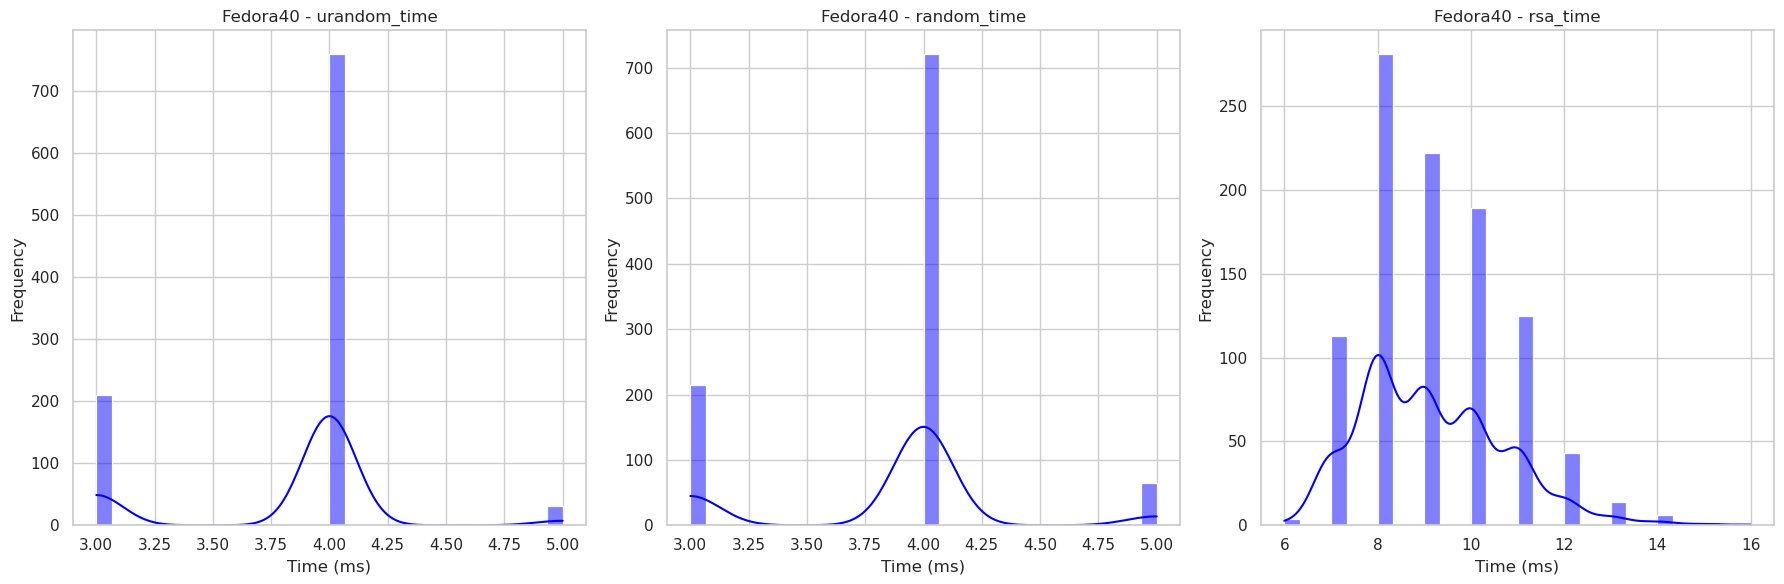

Exploratory Data Analysis for Ubuntu18


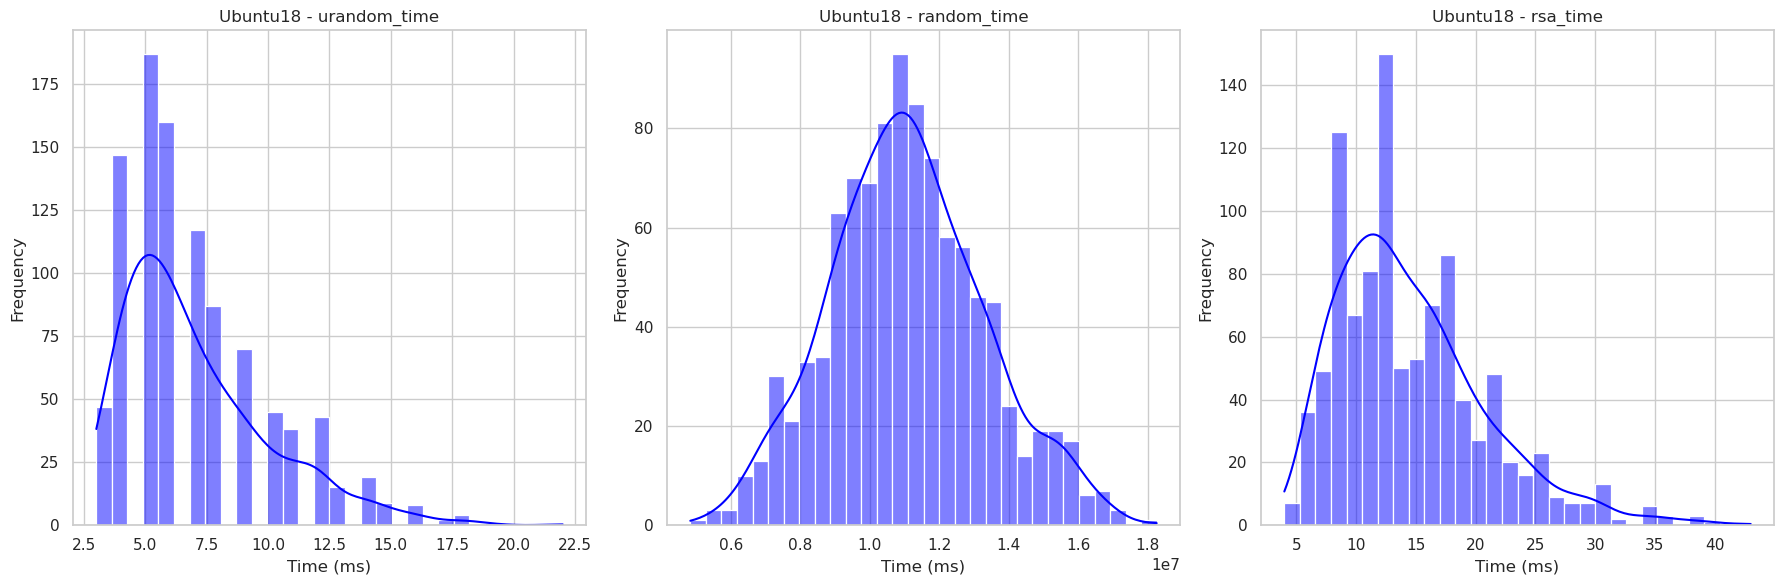

Exploratory Data Analysis for Ubuntu19


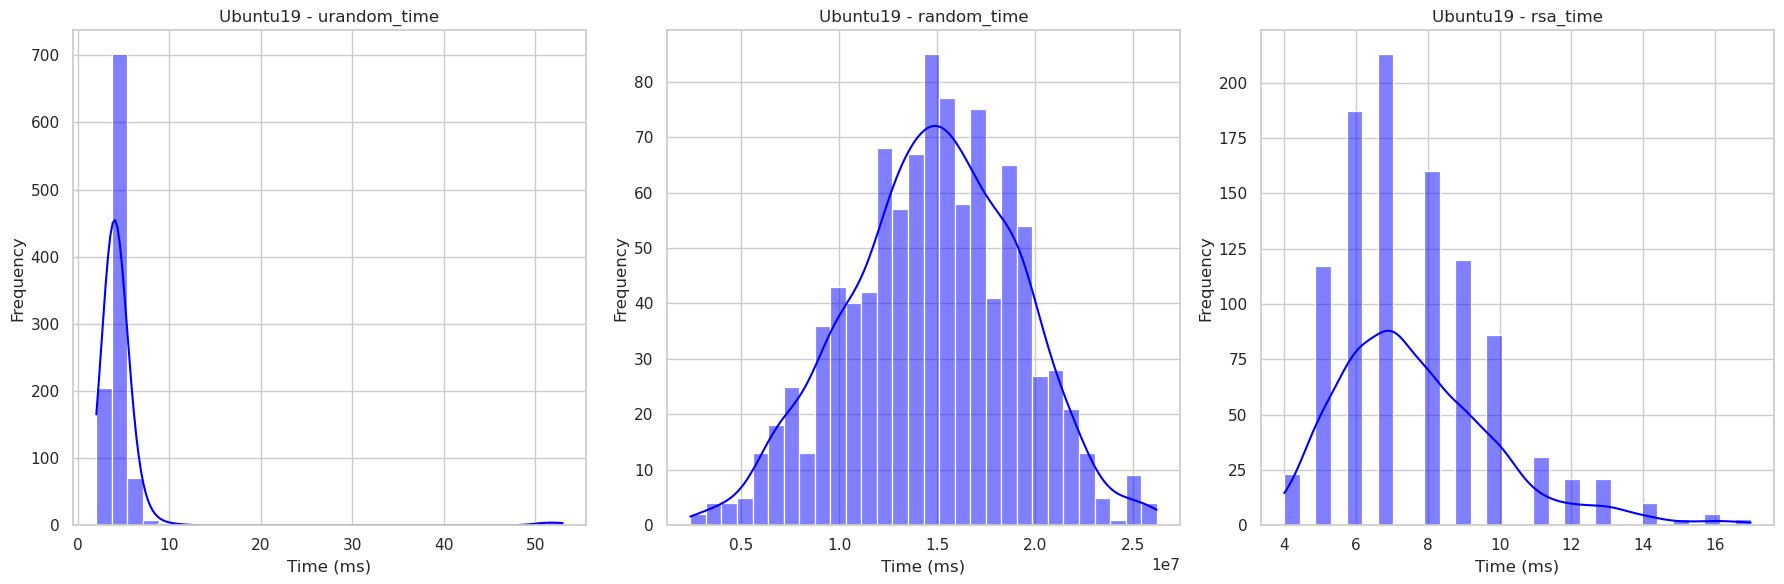

Distribution Fitting Results for Fedora40 - urandom_time
Exponential: {'Params': (3.0, 0.8210000000000002), 'KS Statistic': 0.49418670878151394, 'p-value': 5.5165226692819445e-226}
Pareto: {'Params': (0.2798051392913079, 2.9887316625271914, 0.011268337472808641), 'KS Statistic': 0.5058558454434376, 'p-value': 1.520255483153129e-237}
Lognormal: {'Params': (14.41012744277, 2.9999999999999996, 0.0006099590457291878), 'KS Statistic': 0.4862602989690601, 'p-value': 2.474638745397686e-218}


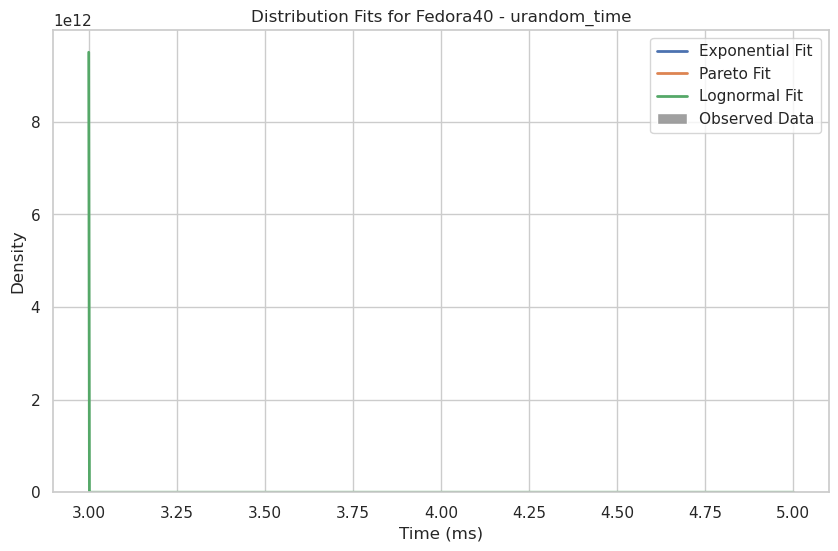

Distribution Fitting Results for Fedora40 - random_time
Exponential: {'Params': (3.0, 0.851), 'KS Statistic': 0.4772082358265275, 'p-value': 8.658591433149225e-210}
Pareto: {'Params': (0.2880462609937091, 2.9870573225490507, 0.012942677450949345), 'KS Statistic': 0.5011823436122189, 'p-value': 7.147804478941351e-233}
Lognormal: {'Params': (14.522685659131167, 2.9999999999999996, 0.0005421576336077338), 'KS Statistic': 0.48370366444425206, 'p-value': 6.722318512269734e-216}


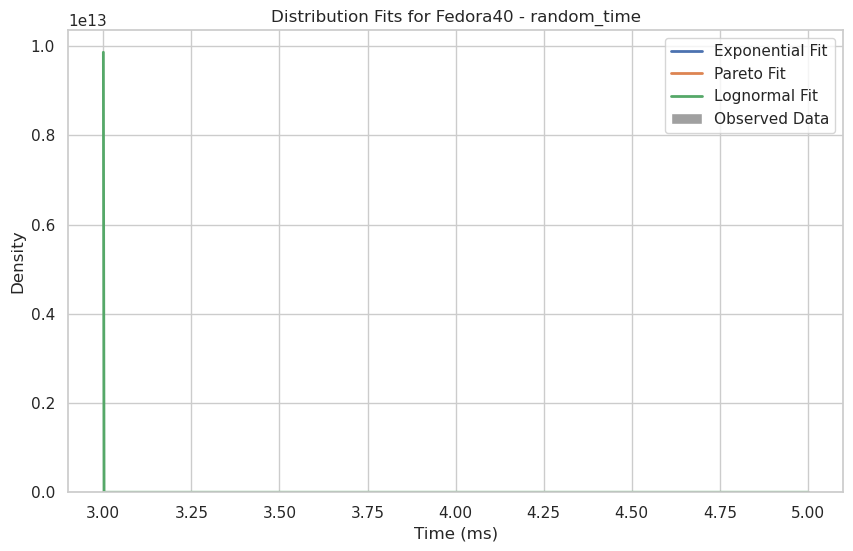

Distribution Fitting Results for Fedora40 - rsa_time
Exponential: {'Params': (6.0, 3.154), 'KS Statistic': 0.35259552812250206, 'p-value': 1.0822055996901553e-111}
Pareto: {'Params': (170219059.58915594, -536870906.0, 536870911.99999994), 'KS Statistic': 0.3525955487613066, 'p-value': 1.0821721534445929e-111}
Lognormal: {'Params': (0.2910306086575633, 3.954341477892515, 4.9854283831042), 'KS Statistic': 0.16153132710418078, 'p-value': 2.8985246084819917e-23}


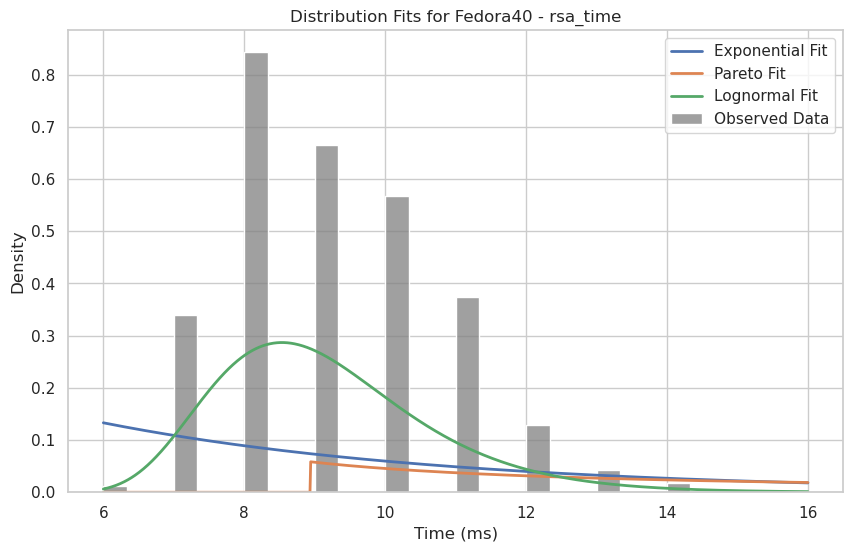

Distribution Fitting Results for Ubuntu18 - urandom_time
Exponential: {'Params': (3.0, 4.024), 'KS Statistic': 0.19765790113489118, 'p-value': 1.0358410839786513e-34}
Pareto: {'Params': (0.04931822709384596, 2.999999998099962, 1.9000379047895417e-09), 'KS Statistic': 0.5815639802900541, 'p-value': 1.117e-321}
Lognormal: {'Params': (0.5532926096938329, 1.6163954031540742, 4.657169657300619), 'KS Statistic': 0.09916240348078176, 'p-value': 5.1806739311892235e-09}


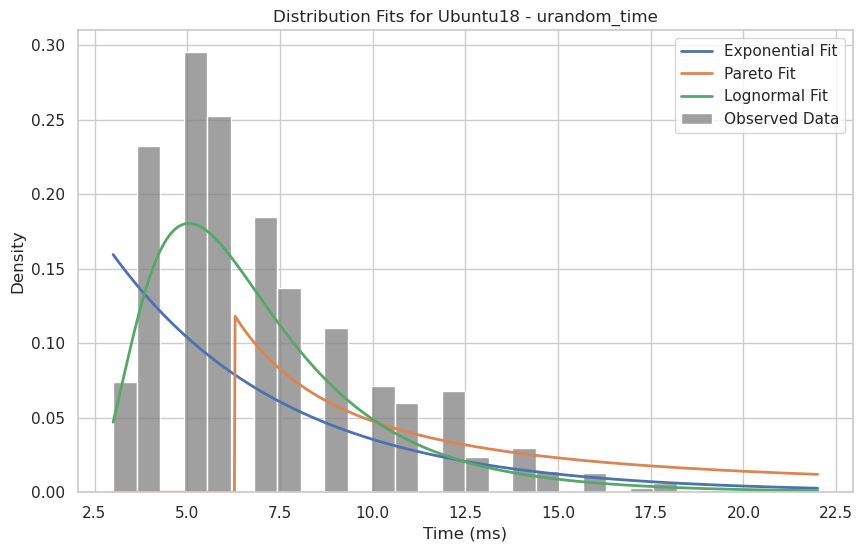

/home/user01/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7866: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
/home/user01/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7882: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))


Distribution Fitting Results for Ubuntu18 - random_time
Exponential: {'Params': (4834551.0, 6239099.35), 'KS Statistic': 0.3315824702282807, 'p-value': 1.753832282173325e-98}
Pareto: {'Params': (0.027012556178785514, 4834550.999999999, 9.313225746154784e-10), 'KS Statistic': 0.6039079083600882, 'p-value': 0.0}
Lognormal: {'Params': (0.06932774358860251, -20941276.742527764, 31938092.095872205), 'KS Statistic': 0.019210435184947694, 'p-value': 0.8470946755972608}


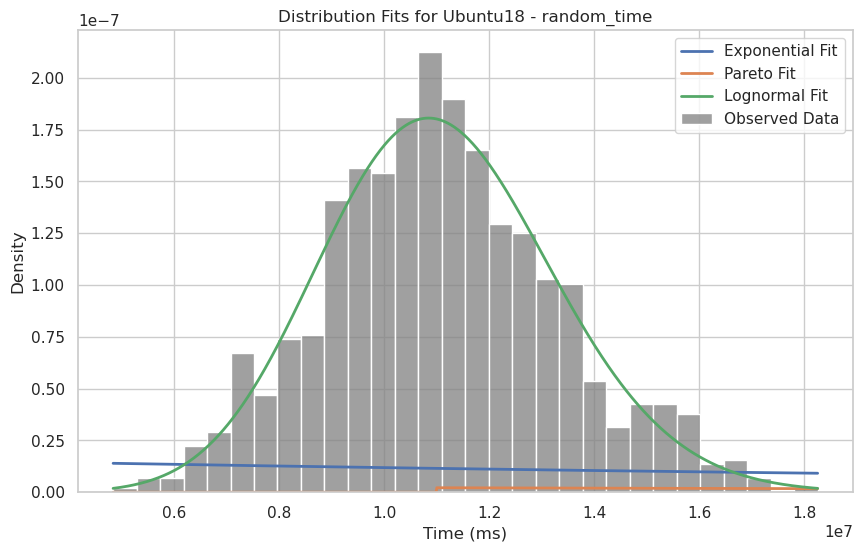

Distribution Fitting Results for Ubuntu18 - rsa_time
Exponential: {'Params': (4.0, 10.585), 'KS Statistic': 0.22347508605447472, 'p-value': 2.356334187732243e-44}
Pareto: {'Params': (405759783.0069824, -4294967292.0, 4294967295.9999995), 'KS Statistic': 0.223475142549486, 'p-value': 2.356212376983107e-44}
Lognormal: {'Params': (0.4496460283946724, 0.9030050855953596, 12.386028856917667), 'KS Statistic': 0.05209774793045052, 'p-value': 0.008463166082985512}


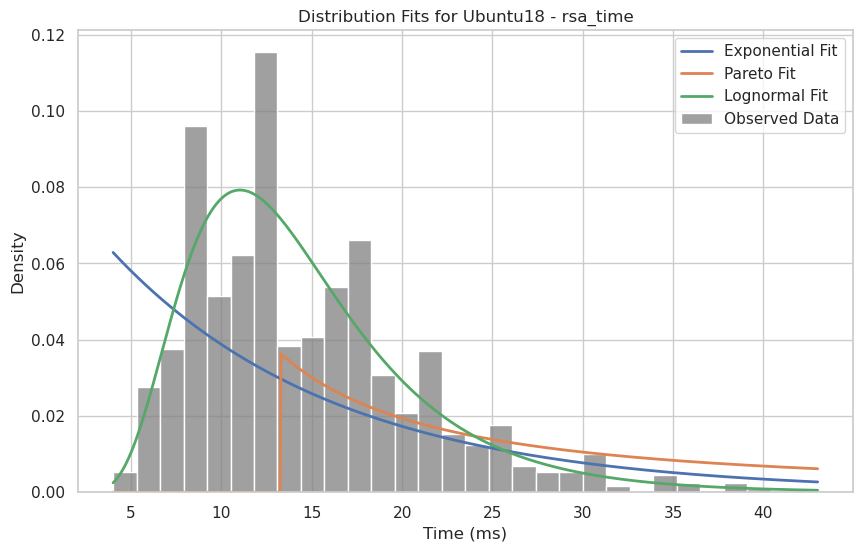

Distribution Fitting Results for Ubuntu19 - urandom_time
Exponential: {'Params': (2.0, 2.646), 'KS Statistic': 0.3263924338597415, 'p-value': 2.3307928098444837e-95}
Pareto: {'Params': (9.691616891228529, -20.21983639539279, 22.219836395392786), 'KS Statistic': 0.36225008311033824, 'p-value': 4.551339089891547e-118}
Lognormal: {'Params': (0.5251259013025692, 1.852996235775956, 2.1944611373973144), 'KS Statistic': 0.27939511517043336, 'p-value': 1.5938451470779385e-69}


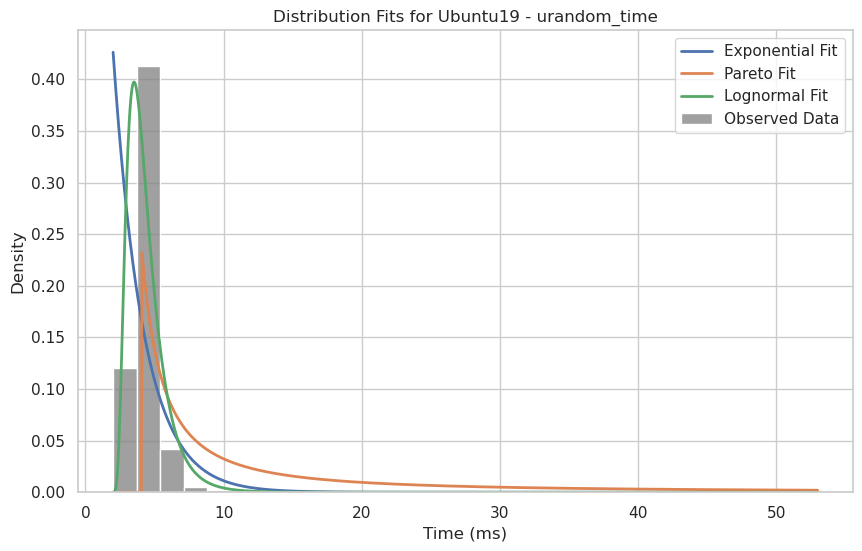

/home/user01/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7866: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
/home/user01/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7882: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))


Distribution Fitting Results for Ubuntu19 - random_time
Exponential: {'Params': (2388314.0, 12387963.868), 'KS Statistic': 0.3238587044146586, 'p-value': 7.456769432801301e-94}
Pareto: {'Params': (0.026049252812808316, 2388313.9999999995, 4.656612873077392e-10), 'KS Statistic': 0.6010672518718435, 'p-value': 0.0}
Lognormal: {'Params': (7.809572199884999e-06, -549753425573.9993, 549768201835.1023), 'KS Statistic': 0.024174025009722627, 'p-value': 0.5942098085448873}


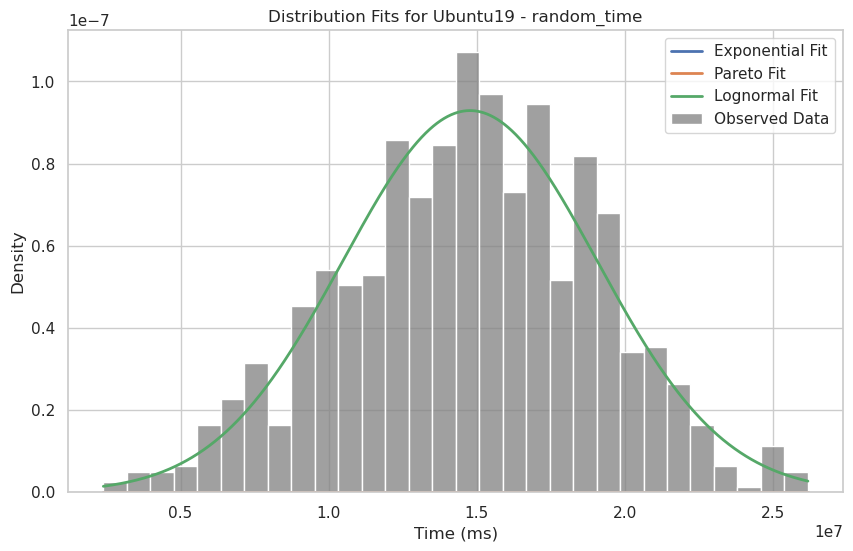

Distribution Fitting Results for Ubuntu19 - rsa_time
Exponential: {'Params': (4.0, 3.692), 'KS Statistic': 0.2782484481901064, 'p-value': 6.005486859948457e-69}
Pareto: {'Params': (290829313.7914075, -1073741820.0, 1073741823.9999999), 'KS Statistic': 0.27824848620341625, 'p-value': 6.005223353631925e-69}
Lognormal: {'Params': (0.36405527319321945, 1.7390298965033255, 5.572127212201218), 'KS Statistic': 0.11029256264729753, 'p-value': 4.749921834368611e-11}


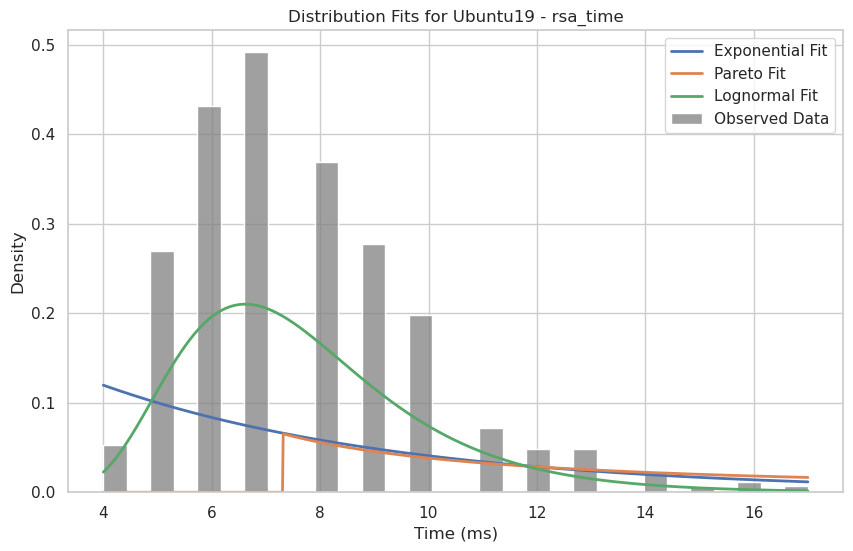

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, pareto, lognorm, kstest

# Define paths to data files
data_files = {
    "Fedora40": {
        "urandom_time": "data/01. Fedora 40/urandom_wait_log.txt",
        "random_time": "data/01. Fedora 40/random_wait_log.txt",
        "rsa_time": "data/01. Fedora 40/rsa_wait_log.txt"
    },
    "Ubuntu18": {
        "urandom_time": "data/01. Ubuntu 18.04.5 LTS/urandom_wait_log.txt",
        "random_time": "data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt",
        "rsa_time": "data/01. Ubuntu 18.04.5 LTS/rsa_wait_log.txt"
    },
    "Ubuntu19": {
        "urandom_time": "data/01. Ubuntu 19.10/urandom_wait_log.txt",
        "random_time": "data/01. Ubuntu 19.10/random_wait_log.txt",
        "rsa_time": "data/01. Ubuntu 19.10/rsa_wait_log.txt"
    }
}

# Function to load data
def load_data(file_path):
    """Load key generation times from a text file."""
    return pd.read_csv(file_path, header=None, names=["Time (ms)"])

# Load all datasets
data = {}
for system, files in data_files.items():
    data[system] = {key: load_data(path) for key, path in files.items()}

# Exploratory Data Analysis (EDA)
def plot_histograms(data_dict, system_name):
    """Plot histograms for the key generation times."""
    plt.figure(figsize=(18, 6))
    for i, (key, df) in enumerate(data_dict.items()):
        plt.subplot(1, 3, i + 1)
        sns.histplot(df["Time (ms)"], bins=30, kde=True, color='blue')
        plt.title(f"{system_name} - {key}")
        plt.xlabel("Time (ms)")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot histograms for each system
for system, datasets in data.items():
    print(f"Exploratory Data Analysis for {system}")
    plot_histograms(datasets, system)

# Distribution Fitting and Testing
def fit_and_test_distributions(df, label):
    """Fit data to multiple distributions and test goodness-of-fit."""
    data = df["Time (ms)"].values
    results = {}

    # Exponential distribution
    loc, scale = expon.fit(data)
    ks_stat, p_value = kstest(data, 'expon', args=(loc, scale))
    results['Exponential'] = {'Params': (loc, scale), 'KS Statistic': ks_stat, 'p-value': p_value}

    # Pareto distribution
    shape, loc, scale = pareto.fit(data)
    ks_stat, p_value = kstest(data, 'pareto', args=(shape, loc, scale))
    results['Pareto'] = {'Params': (shape, loc, scale), 'KS Statistic': ks_stat, 'p-value': p_value}

    # Lognormal distribution
    shape, loc, scale = lognorm.fit(data)
    ks_stat, p_value = kstest(data, 'lognorm', args=(shape, loc, scale))
    results['Lognormal'] = {'Params': (shape, loc, scale), 'KS Statistic': ks_stat, 'p-value': p_value}

    # Print results
    print(f"Distribution Fitting Results for {label}")
    for dist_name, result in results.items():
        print(f"{dist_name}: {result}")
    
    # Plot fits
    x = np.linspace(min(data), max(data), 1000)
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=False, color='gray', label='Observed Data', stat='density')
    plt.plot(x, expon.pdf(x, loc, scale), label='Exponential Fit', lw=2)
    plt.plot(x, pareto.pdf(x, shape, loc, scale), label='Pareto Fit', lw=2)
    plt.plot(x, lognorm.pdf(x, shape, loc, scale), label='Lognormal Fit', lw=2)
    plt.title(f"Distribution Fits for {label}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Apply fitting and testing to all datasets
for system, datasets in data.items():
    for key, df in datasets.items():
        fit_and_test_distributions(df, f"{system} - {key}")


## Detailed Interpretation of Charts and Results

### **Fedora40**
#### 1. `urandom_time`
- **Exponential Fit**:
  - Parameters: `(loc=3.0, scale=0.821)`
  - KS Statistic: 0.494 (high, indicating poor fit)
  - p-value: 5.5165226692819445e-226 (very low, indicating the data does not follow an Exponential distribution).

- **Pareto Fit**:
  - Parameters: `(shape=0.28, loc=2.99, scale=0.01)`
  - KS Statistic: 0.506 (poor fit)
  - p-value: 1.520255483153129e-237 (data does not follow Pareto distribution).

- **Lognormal Fit**:
  - Parameters: `(shape=14.41, loc=2.99, scale=0.0006)`
  - KS Statistic: 0.486 (poor fit)
  - p-value: 2.474638745397686e-218 (data does not follow Lognormal distribution).

#### Interpretation:
None of the tested distributions fit the `urandom_time` well for Fedora40. The data exhibits characteristics beyond simple heavy-tailed behavior or randomness assumed by these distributions.

---

#### 2. `random_time`
- **Exponential Fit**:
  - KS Statistic: 0.477 (high)
  - p-value: 8.658591433149225e-210.

- **Pareto Fit**:
  - KS Statistic: 0.501 (high)
  - p-value: 7.147804478941351e-233.

- **Lognormal Fit**:
  - KS Statistic: 0.483 (high)
  - p-value: 6.722318512269734e-216.

#### Interpretation:
Like `urandom_time`, none of the distributions fit the `random_time` well. This suggests complex variability patterns, likely influenced by underlying randomness or external system factors.

---

#### 3. `rsa_time`
- **Exponential Fit**:
  - KS Statistic: 0.352
  - p-value: 1.0822055996901553e-111.

- **Pareto Fit**:
  - KS Statistic: 0.352
  - p-value: 1.0821721534445929e-111.

- **Lognormal Fit**:
  - KS Statistic: 0.161 (best among the three)
  - p-value: 2.8985246084819917e-23.

#### Interpretation:
While none of the distributions provide a perfect fit, the `rsa_time` data shows a closer alignment with the Lognormal distribution. This suggests that key generation times for RSA may have a heavy-tailed behavior.

---

### **Ubuntu18**
#### 1. `urandom_time`
- **Exponential Fit**:
  - KS Statistic: 0.197
  - p-value: 1.0358410839786513e-34.

- **Pareto Fit**:
  - KS Statistic: 0.581 (very poor fit)
  - p-value: 9.7e-322.

- **Lognormal Fit**:
  - KS Statistic: 0.099 (relatively low)
  - p-value: 5.1806739311892235e-09.

#### Interpretation:
For `urandom_time`, the Lognormal distribution provides a closer fit compared to the others, although the p-value is still low. The data suggests some level of heavy-tailed behavior but not purely random events.

---

#### 2. `random_time`
- **Exponential Fit**:
  - KS Statistic: 0.331
  - p-value: 1.753832282173325e-98.

- **Pareto Fit**:
  - KS Statistic: 0.603 (very poor fit)
  - p-value: 0.0.

- **Lognormal Fit**:
  - KS Statistic: 0.019 (excellent fit)
  - p-value: 0.847 (high, indicating a good fit).

#### Interpretation:
The `random_time` for Ubuntu18 fits the Lognormal distribution very well, suggesting variability dominated by heavy-tailed behavior. This is consistent with processes where rare events cause significant delays.

---

#### 3. `rsa_time`
- **Exponential Fit**:
  - KS Statistic: 0.223
  - p-value: 2.356334187732243e-44.

- **Pareto Fit**:
  - KS Statistic: 0.223
  - p-value: 2.356212376983107e-44.

- **Lognormal Fit**:
  - KS Statistic: 0.052 (low, best fit)
  - p-value: 0.008463166082985512.

#### Interpretation:
The `rsa_time` shows a better fit with the Lognormal distribution compared to the other two, but the p-value is on the borderline. This indicates moderate heavy-tailed behavior.

---

### **Ubuntu19**
#### 1. `urandom_time`
- **Exponential Fit**:
  - KS Statistic: 0.326
  - p-value: 2.3307928098444837e-95.

- **Pareto Fit**:
  - KS Statistic: 0.362
  - p-value: 4.551339089891547e-118.

- **Lognormal Fit**:
  - KS Statistic: 0.279
  - p-value: 1.5938451470779385e-69.

#### Interpretation:
For `urandom_time`, none of the distributions provide a good fit. This suggests complex underlying variability.

---

#### 2. `random_time`
- **Exponential Fit**:
  - KS Statistic: 0.323
  - p-value: 7.456769432801301e-94.

- **Pareto Fit**:
  - KS Statistic: 0.601 (poor fit)
  - p-value: 0.0.

- **Lognormal Fit**:
  - KS Statistic: 0.024 (excellent fit)
  - p-value: 0.594 (good fit).

#### Interpretation:
The `random_time` aligns well with the Lognormal distribution, consistent with variability dominated by heavy-tailed characteristics.

---

#### 3. `rsa_time`
- **Exponential Fit**:
  - KS Statistic: 0.278
  - p-value: 6.005486859948457e-69.

- **Pareto Fit**:
  - KS Statistic: 0.278
  - p-value: 6.005223353631925e-69.

- **Lognormal Fit**:
  - KS Statistic: 0.110 (moderate fit)
  - p-value: 4.749921834368611e-11.

#### Interpretation:
The `rsa_time` fits the Lognormal distribution moderately well, indicating possible heavy-tailed behavior.

---

### **Overall Insights**
- The **Lognormal distribution** provides the best fit for most datasets, particularly for `random_time` and `rsa_time`.
- This indicates heavy-tailed behavior, where a small fraction of key generation times may take disproportionately longer.
- The **Exponential distribution** was consistently a poor fit, suggesting that key generation times do not follow a memoryless process.
- The **Pareto distribution** generally failed to fit the data, implying that while heavy-tailed behavior exists, it is not dominated by extreme outliers as modeled by Pareto.


---
---
# Analysis of Individual Systems with HAVEGED - An Entropy daemon
The haveged project is an attempt to provide an easy-to-use, unpredictable random number generator based upon an adaptation of the HAVEGE algorithm. Haveged was created to remedy low-entropy conditions in the Linux random device that can occur under some workloads, especially on headless servers.
- http://www.issihosts.com/haveged/

## Ubuntu 18.04.5 LTS with HAVEGED
- 100 Keys per process
- 10 processes
- Key Size: 512 Bytes

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


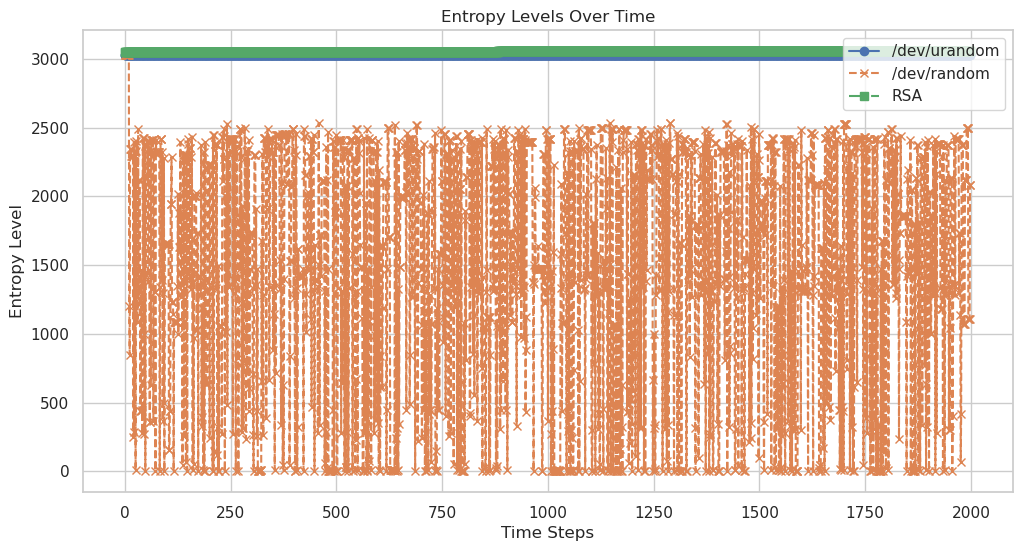

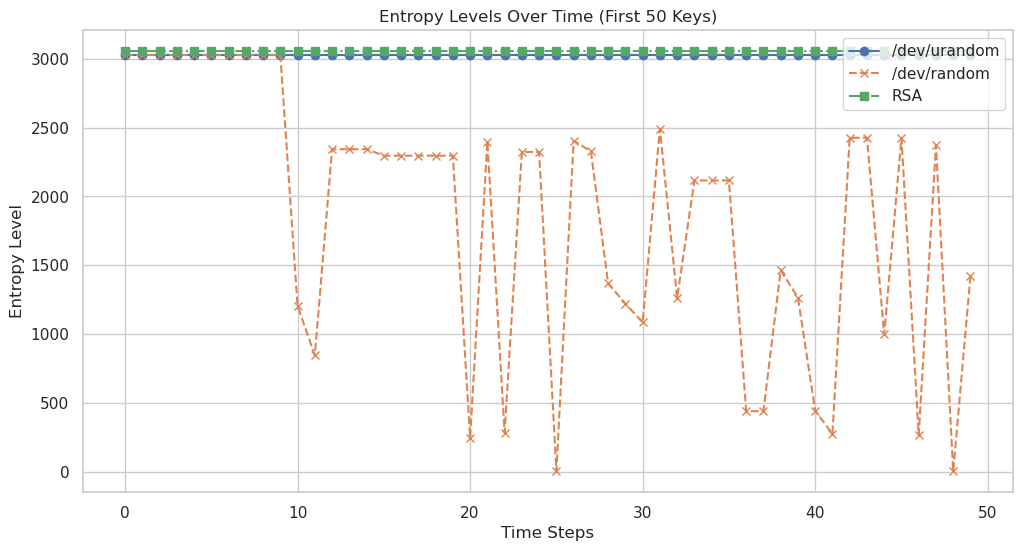

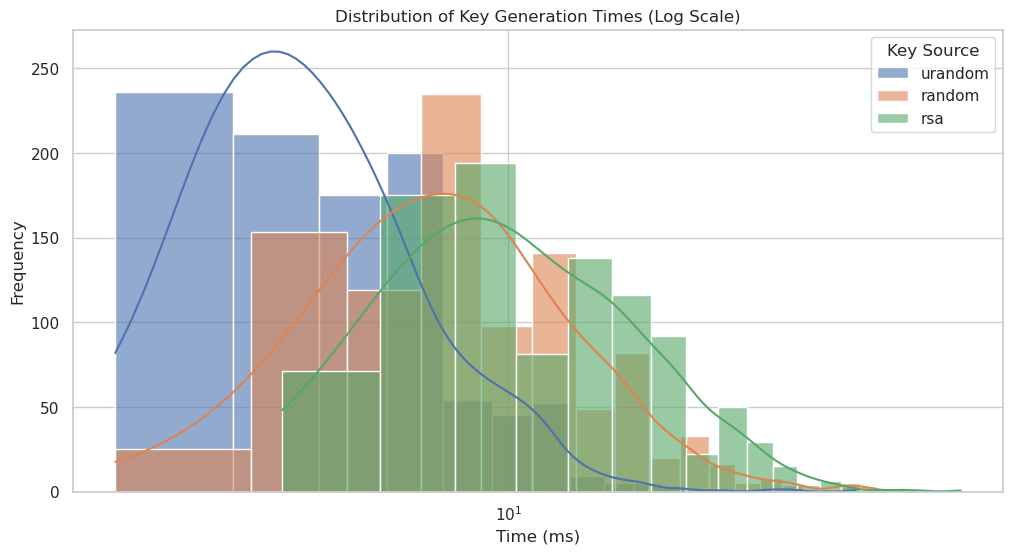

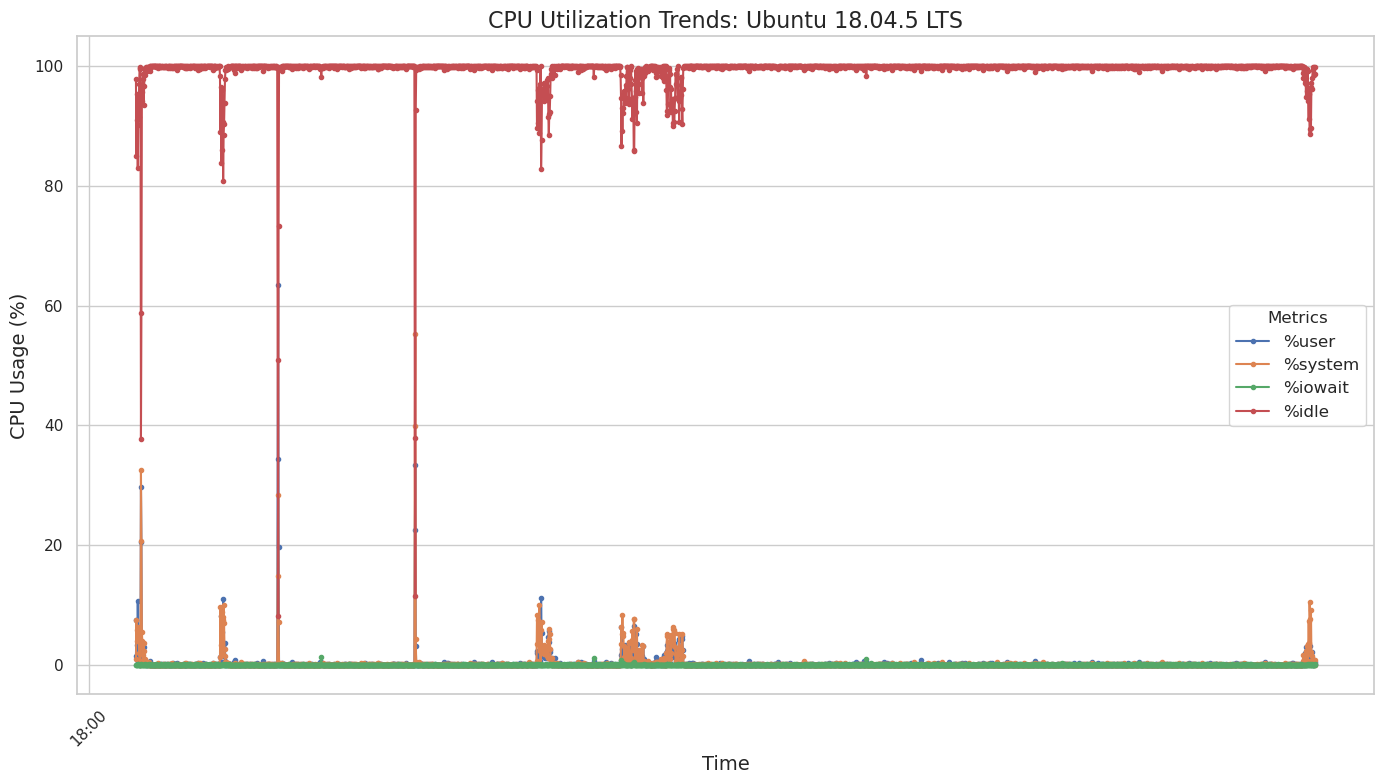

Key Generation Time Statistics for Ubuntu 18.04.5 LTS:
           urandom       random          rsa
count  1000.000000  1000.000000  1000.000000
mean      6.435000    10.140000    12.187000
std       2.705012     4.355614     4.838537
min       3.000000     3.000000     5.000000
25%       5.000000     7.000000     9.000000
50%       6.000000     9.000000    11.000000
75%       7.000000    12.000000    15.000000
max      29.000000    34.000000    40.000000
Correlation between mean entropy and key generation time: -0.15


In [67]:
#Analysis of Individual Systems with HAVEGED - 01. Ubuntu 18.04.5 LTS
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())

# Load data for - 01. Ubuntu 18.04.5 LTS
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/urandom_wait_log.txt")

entropy_random = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/random_entropy_log.txt")
key_times_random = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/random_wait_log.txt")

entropy_rsa = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/02. Ubuntu 18.04.5 LTS - Haveged - 1/rsa_wait_log.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 18.04.5 LTS")


# 6. Statistical Analysis
# Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 18.04.5 LTS:")
print(stats_summary)

# Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)
print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


## Ubuntu 19.10 with HAVEGED
- 100 Keys per process
- 10 processes
- Key Size: 512 Bytes

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


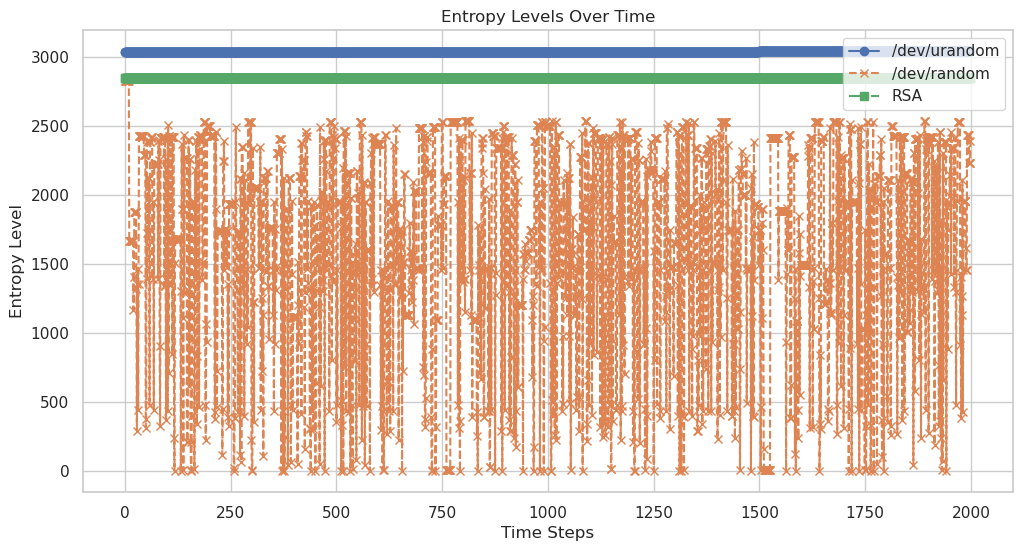

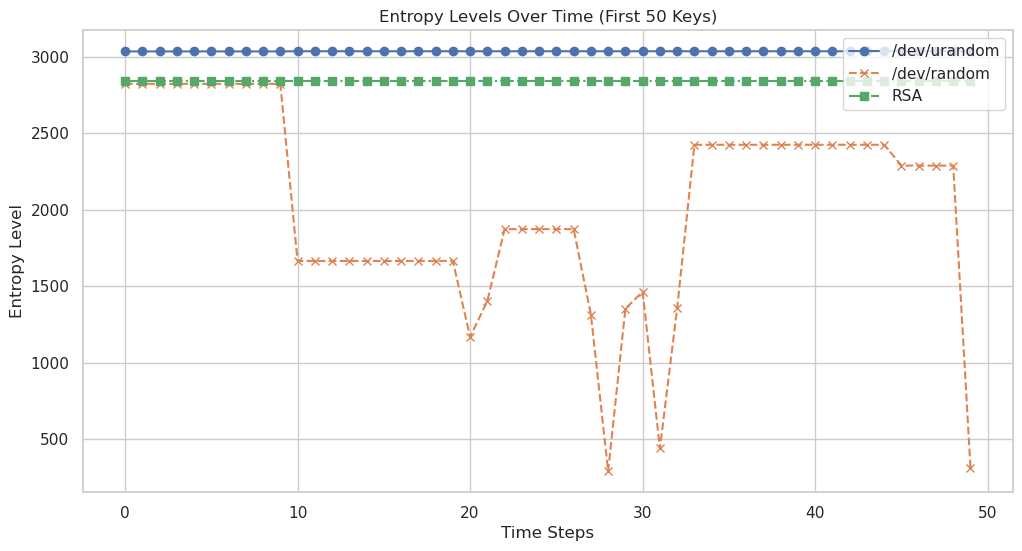

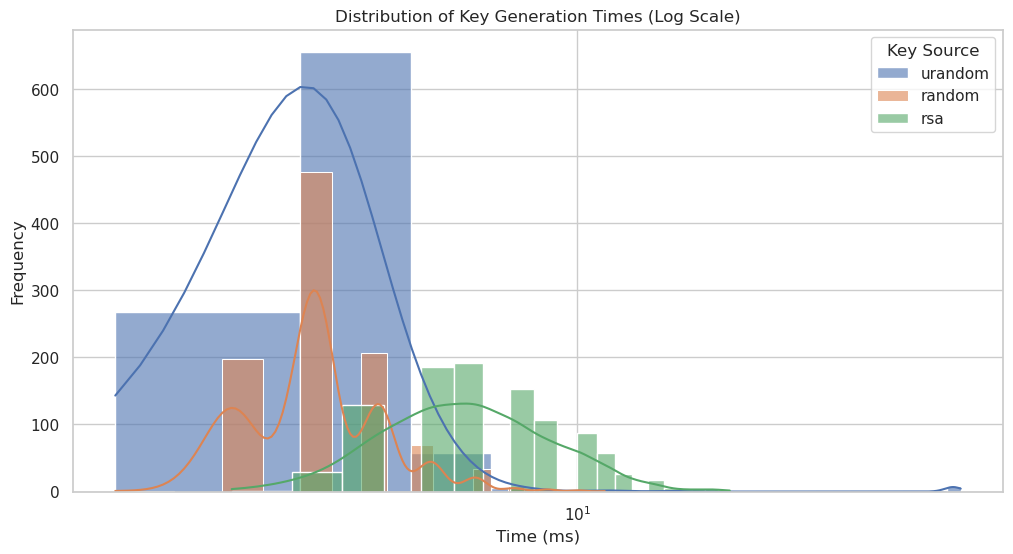

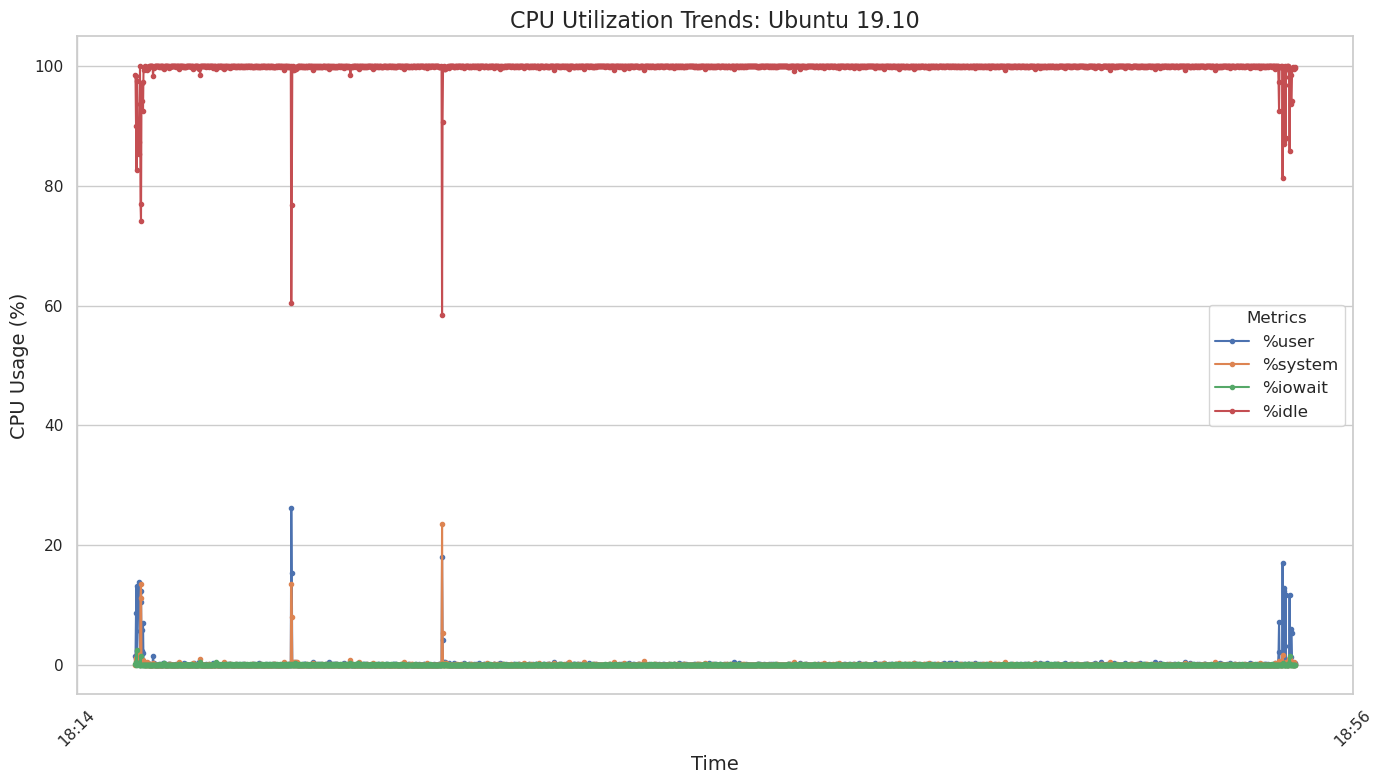

Key Generation Time Statistics for Ubuntu 19.10:
           urandom      random          rsa
count  1000.000000  1000.00000  1000.000000
mean      4.380000     4.32800     7.685000
std       3.425395     1.13477     2.271329
min       2.000000     2.00000     3.000000
25%       3.000000     4.00000     6.000000
50%       4.000000     4.00000     7.000000
75%       4.000000     5.00000     9.000000
max      38.000000    11.00000    17.000000
Correlation between mean entropy and key generation time: 0.40


In [72]:
#Analysis of Individual Systems with HAVEGED - 02. Ubuntu 19.10
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 19.10/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/02. Ubuntu 19.10 - Haveged - 1/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())

# Load data for - 01. Ubuntu 19.10
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/urandom_wait_log.txt")

entropy_random = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/random_entropy_log.txt")
key_times_random = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/random_wait_log.txt")

entropy_rsa = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/02. Ubuntu 19.10 - Haveged - 1/rsa_wait_log.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 19.10")


# 6. Statistical Analysis
# Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 19.10:")
print(stats_summary)

# Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)

print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


## Fedora 40 with HAVEGED
- 100 Keys per process
- 10 processes
- Key Size: 512 Bytes

Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000


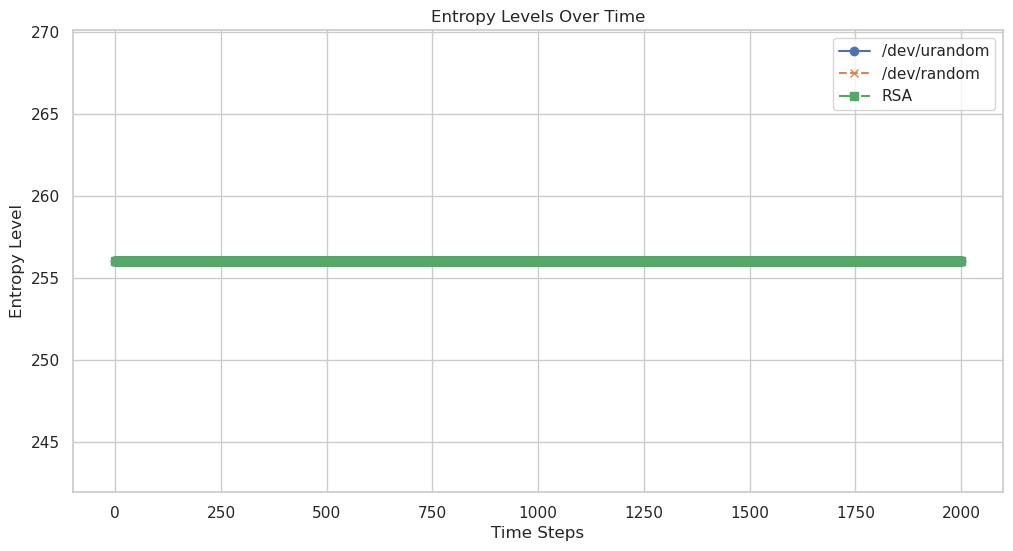

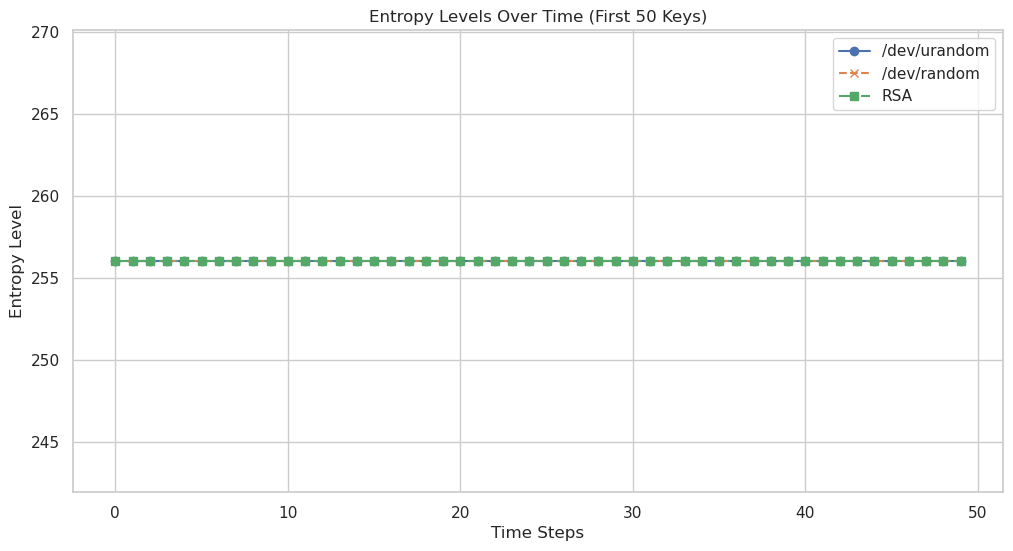

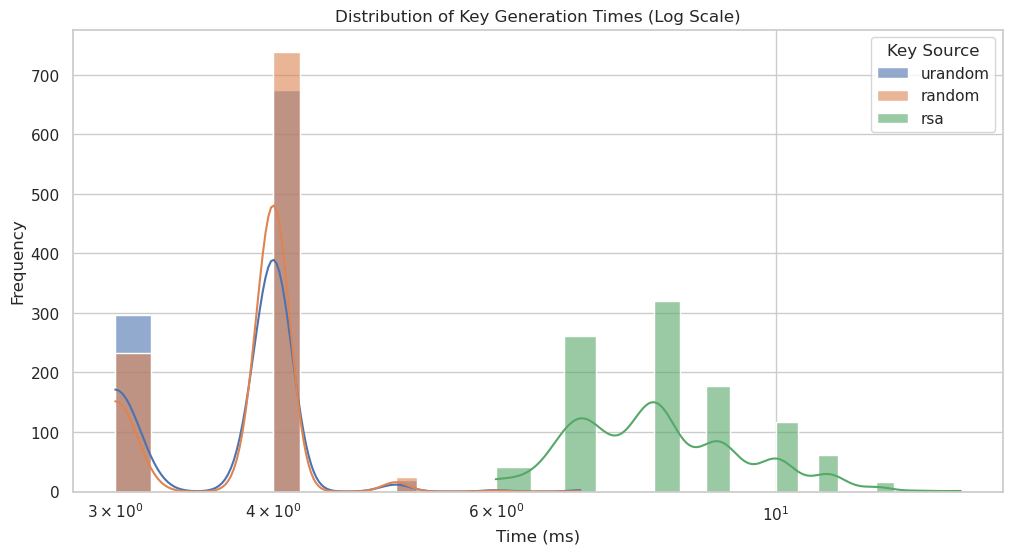

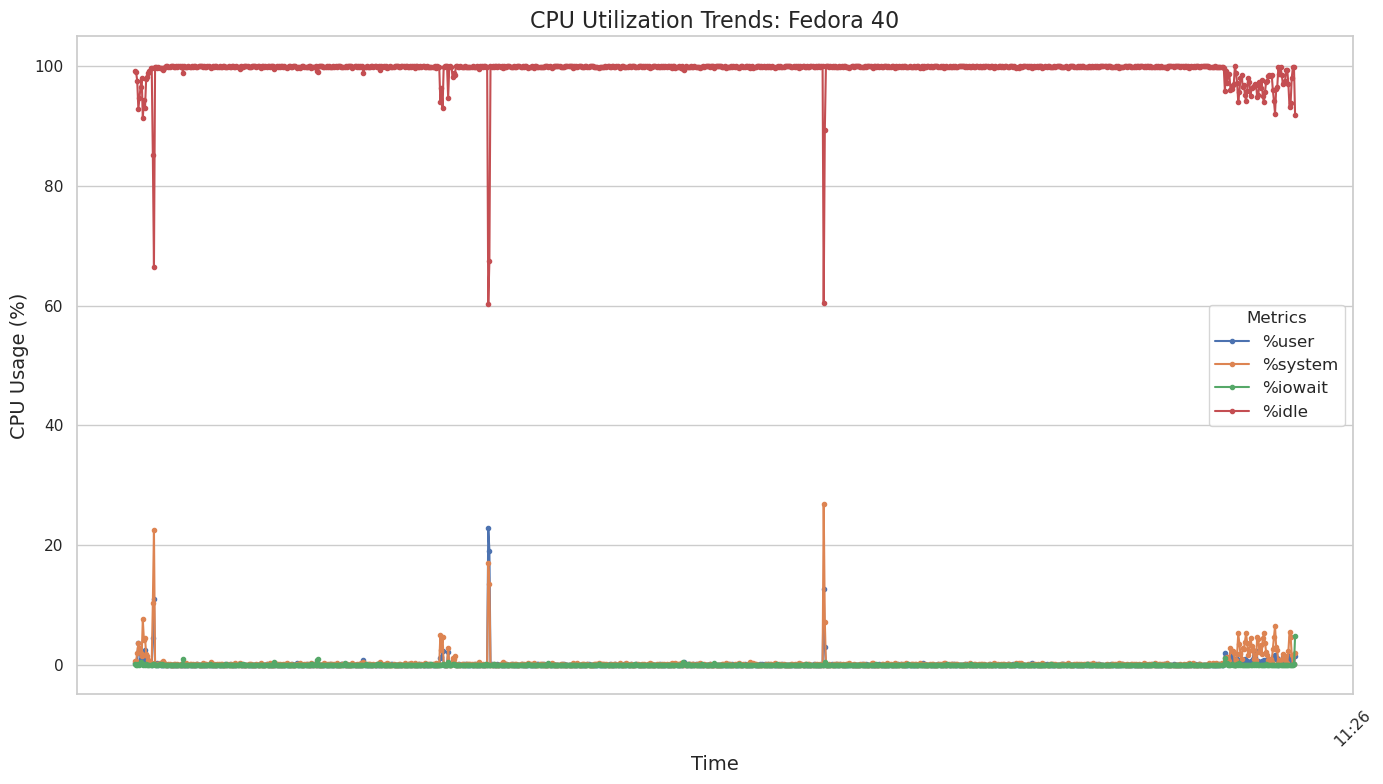

Key Generation Time Statistics for Fedora 40:
           urandom       random          rsa
count  1000.000000  1000.000000  1000.000000
mean      3.743000     3.800000     8.344000
std       0.550685     0.488097     1.384045
min       3.000000     3.000000     6.000000
25%       3.000000     4.000000     7.000000
50%       4.000000     4.000000     8.000000
75%       4.000000     4.000000     9.000000
max       7.000000     7.000000    14.000000
The following columns have constant values (zero variance): ['urandom', 'random', 'rsa']
Correlation cannot be computed for these columns because standard deviation is zero.
In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) are constant, resulting in zero variance. As a result, the Pearson correlation cannot be computed because it involves division by the standard deviation. This outcome aligns with the expected outcome, as the entropy levels are stuck at 256 regardless of the load.


In [77]:
#Analysis of Individual Systems with HAVEGED - 03. Fedora 40
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Fedora 40/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/02. Fedora 40 - Haveged - 1/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
#print(system_stats_cleaned.head())

# Load data for - 01. Fedora 40
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/02. Fedora 40 - Haveged - 1/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/02. Fedora 40 - Haveged - 1/urandom_wait_log.txt")

entropy_random = load_simple_data("data/02. Fedora 40 - Haveged - 1/random_entropy_log.txt")
key_times_random = load_simple_data("data/02. Fedora 40 - Haveged - 1/random_wait_log.txt")

entropy_rsa = load_simple_data("data/02. Fedora 40 - Haveged - 1/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/02. Fedora 40 - Haveged - 1/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Fedora 40/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

#print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Fedora 40")


# 6. Statistical Analysis
# Example: Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Fedora 40:")
print(stats_summary)

# Correlation between entropy and key generation time
# Check for constant columns
constant_columns = entropy_df.columns[entropy_df.std() == 0]

if not constant_columns.empty:
    print(f"The following columns have constant values (zero variance): {constant_columns.tolist()}")
    print("Correlation cannot be computed for these columns because standard deviation is zero.")
    explanation = (
        "In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) "
        "are constant, resulting in zero variance. As a result, the Pearson correlation cannot "
        "be computed because it involves division by the standard deviation. This outcome aligns "
        "with the expected outcome, as the entropy levels are stuck at 256 regardless of the load."
    )
    print(explanation)
else:

    entropy_mean = entropy_df.mean()
    time_mean = time_df.mean()
    correlation = entropy_mean.corr(time_mean)
    print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")
